# 💹 리튬 ETF 주가 확인

상장 지수 펀드, ETF  
ETF란 Exchage Traded Fund의 줄임말로 특정 지수를 추종하는 인덱스 펀드를 거래소에 상장시켜 주식처럼 거래할 수 있도록 만든 펀드를 뜻합니다.  
그래서 ETF는 ‘상장 지수 펀드’라고도 불립니다.

2022년 리튬 배터리 거래량이 증가한 주된 이유는 전기차(EV) 시장의 급성장과 리튬 수요의 급증에 있습니다. 몇 가지 주요 요인을 정리하면 다음과 같습니다:

전기차 시장 성장: 2022년 전기차 판매가 급격히 증가하면서 배터리 수요가 함께 증가했습니다. 2022년 전 세계 자동차용 리튬 이온 배터리 수요는 2021년에 비해 약 65% 증가하여 550 GWh에 달했습니다. 특히 중국과 미국에서 전기차 판매가 급증하며 배터리 수요가 크게 늘었습니다​ (IEA)​.

리튬 가격 상승: 2021년부터 리튬 가격이 계속해서 사상 최고치를 경신했습니다. 2022년에도 리튬 공급이 수요를 따라잡지 못하면서 가격이 강세를 유지했습니다. 이러한 공급 부족과 강한 수요는 리튬 거래량 증가로 이어졌습니다​ (S&P Global)​.

배터리 기술 발전: 배터리 기술의 발전과 함께 리튬을 사용하는 다양한 화학물질이 시장에 도입되면서 리튬 수요가 증가했습니다. 특히 중국에서 리튬 인산철(LFP) 배터리의 사용이 증가하면서 리튬 수요를 더욱 부추겼습니다​ (IEA)​.

이러한 요인들이 결합되어 2022년 리튬 배터리 거래량이 크게 증가한 것입니다.

#### 참고 문헌
https://www.weforum.org/agenda/2021/01/electric-vehicles-breakthrough-tesla-china/  
https://www.iea.org/news/demand-for-electric-cars-is-booming-with-sales-expected-to-leap-35-this-year-after-a-record-breaking-2022

In [1]:
import yfinance as yf
import pandas as pd

# 금 가격
gold_ticker = 'GLD'
g_df = yf.download(gold_ticker, start='2013-01-01')['Adj Close'].round(4)

# 리튬 ETF
lithium_ticker = 'LIT'
l_df = yf.download(lithium_ticker, start='2013-01-01')['Adj Close'].round(4)

# 데이터프레임 합치기
c_df = pd.DataFrame({
    'Gold': g_df,
    'Lithium': l_df
})

# 데이터프레임 확인
c_df.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Gold,Lithium
Date,,
2013-01-02,163.17,25.6669
2013-01-03,161.20,25.5802
2013-01-04,160.44,25.6149
2013-01-07,159.43,25.6843
2013-01-08,160.56,25.4935


In [2]:
pre_l_df = pd.DataFrame(l_df)
pre_l_df.columns = ['Lithium']
pre_g_df = pd.DataFrame(g_df)
pre_g_df.columns = ['Gold']

# 금 가격과 리튬 ETF 그래프 확인

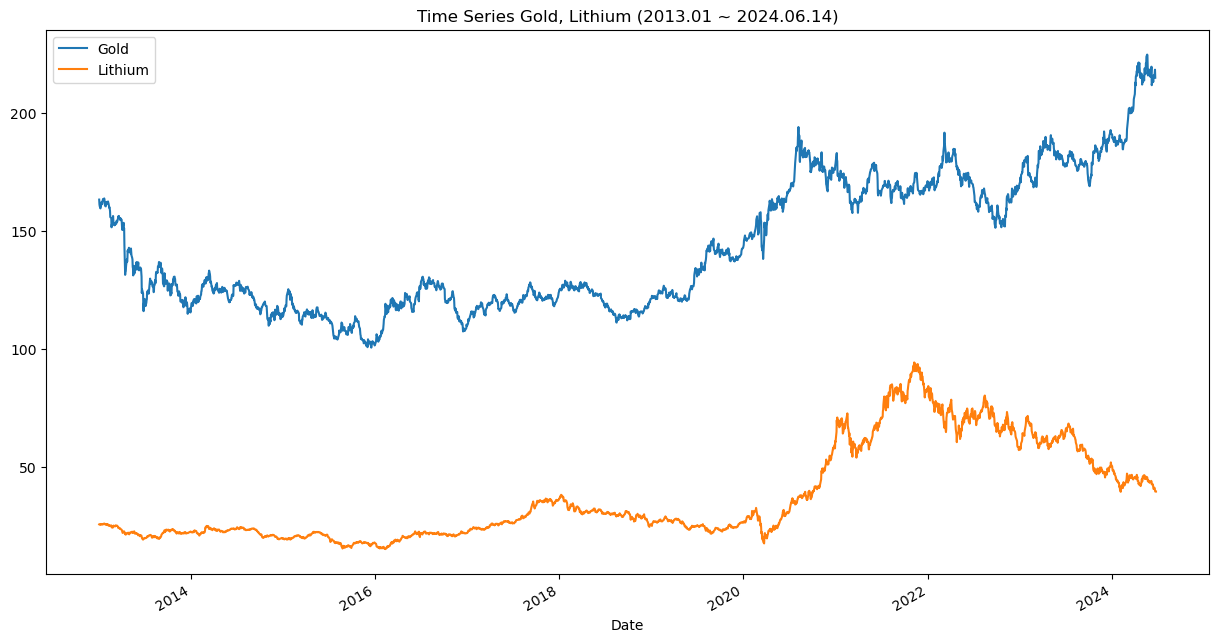

In [3]:
import matplotlib.pyplot as plt

# c_df.plot(figsize=(10, 10), subplots = True)
# plt.show()


c_df.plot(figsize=(15, 8))
plt.title("Time Series Gold, Lithium (2013.01 ~ 2024.06.14)")
c_df
# 그래프를 화면에 표시
plt.show()

- 10년간 금과 리튬의 가격을 봤을 때 리튬이온베터리가 상대적으로 특정 시점에 가격이 많이 오른 것으로 보이나 현재는 하락세를 보이고 있기 때문에  
  우연변동데이터로 파악된다.

# 해당 근거를 확인하기 위해 ar을 확인해보도록 한다.

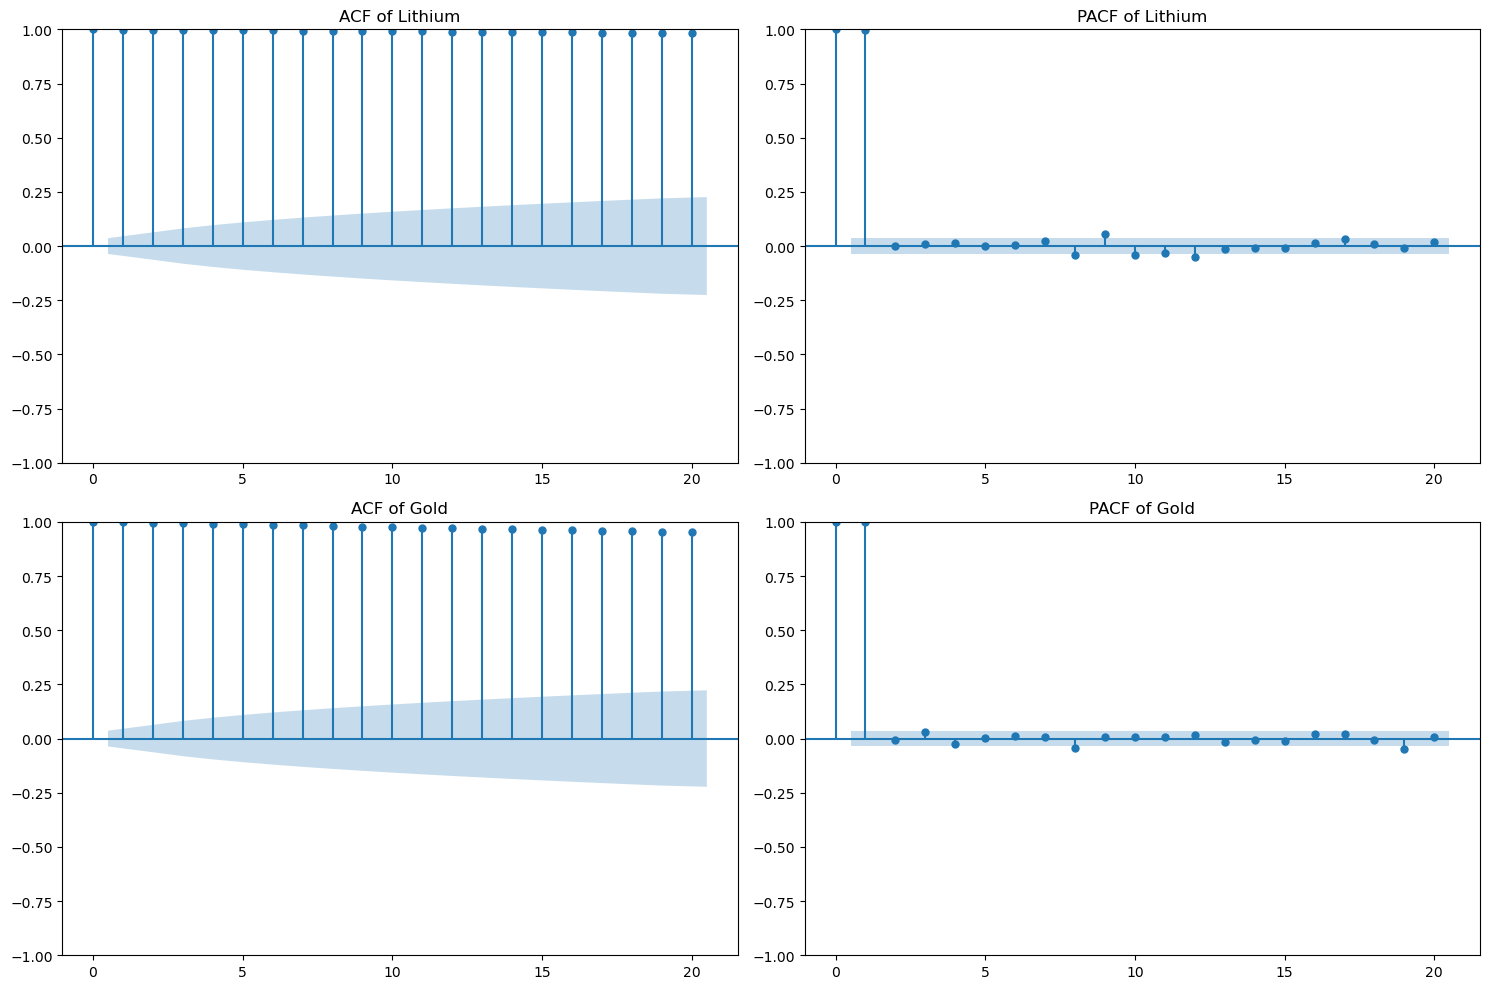

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# 그래프의 행, 열 및 크기 조절
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# l_df에 대한 ACF와 PACF 플롯
plot_acf(l_df, lags=20, ax=ax[0][0])
ax[0][0].set_title('ACF of Lithium')

plot_pacf(l_df, lags=20, ax=ax[0][1])
ax[0][1].set_title('PACF of Lithium')

# g_df에 대한 ACF와 PACF 플롯
plot_acf(g_df, lags=20, ax=ax[1][0])
ax[1][0].set_title('ACF of Gold')

plot_pacf(g_df, lags=20, ax=ax[1][1])
ax[1][1].set_title('PACF of Gold')

# 레이아웃 조절
plt.tight_layout()
plt.show()

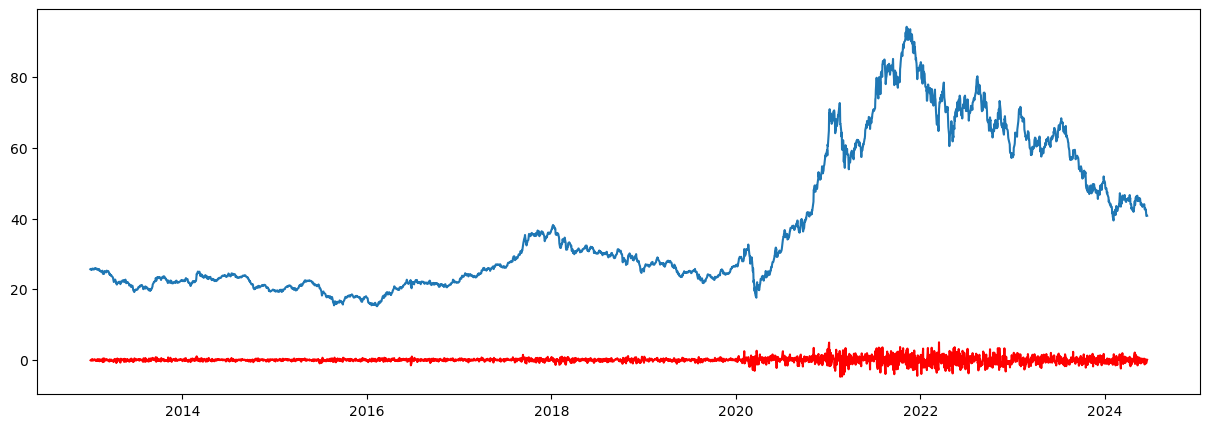

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# 차분 없이 원본 (비정상 시계열 데이터)
plt.plot(l_df['2013-01-02':].dropna())

# 1차 차분을 사용했을 때 데이터의 정상성을 확보할 수 있으며 필요시 추가적인 차분을 통해 정상성의 비율을 높일 수 있습니다.
plt.plot(l_df['2013-01-02':].diff().dropna(), c='red')

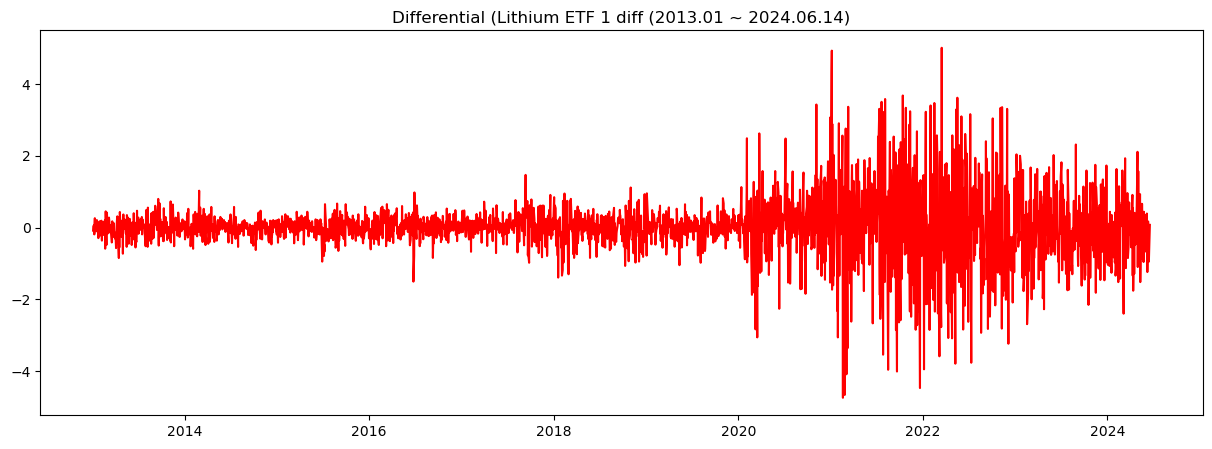

In [6]:
# 1차 차분을 사용했을 때 데이터의 정상성을 확보할 수 있으며 필요시 추가적인 차분을 통해 정상성의 비율을 높일 수 있습니다.
plt.figure(figsize=(15, 5))
plt.plot(l_df['2013-01-02':].diff().dropna(), c='red')
plt.title('Differential (Lithium ETF 1 diff (2013.01 ~ 2024.06.14)')
plt.show()

### 금과 리튬 모두 추세를 acf 그래프를 확인했을 때 추세를 보이고 있으며 비정상 시계열 데이터임을 확인할 수 있다. 또한 1차 차분 결과를 그래프로 확인했을 때 정상성을 띄는 모습을 보이고 있다.

## 실제 변화율을 확인해보도록 하겠다.

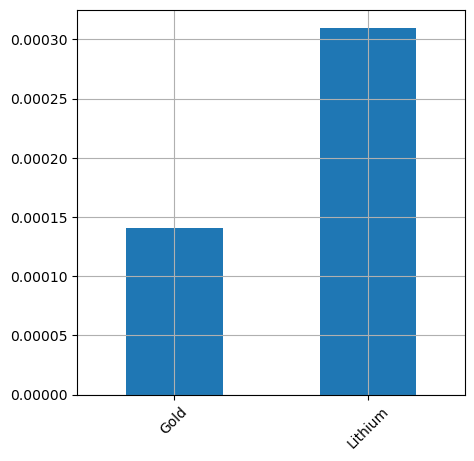

In [7]:
# 변화율! 확인
c_df.pct_change().mean().plot(kind='bar',figsize=(5,5), grid=True)
plt.xticks(rotation=45)
plt.show()

In [8]:
import numpy as np

# 수익률 df
# 수익률의 경우 다음날과 비교하여 전날의 수익률을 나눠야 하기 때문에 해당 공식을 사용
rate_c_df = np.log(c_df / c_df.shift(1))
rate_c_df

,Gold,Lithium
Date,,
2013-01-02,NaN,NaN
2013-01-03,-0.012147,-0.003384
2013-01-04,-0.004726,0.001356
2013-01-07,-0.006315,0.002706
2013-01-08,0.007063,-0.007456
...,...,...
2024-06-11,0.002853,-0.012685
2024-06-12,0.002658,0.001181
2024-06-13,-0.008184,-0.022688


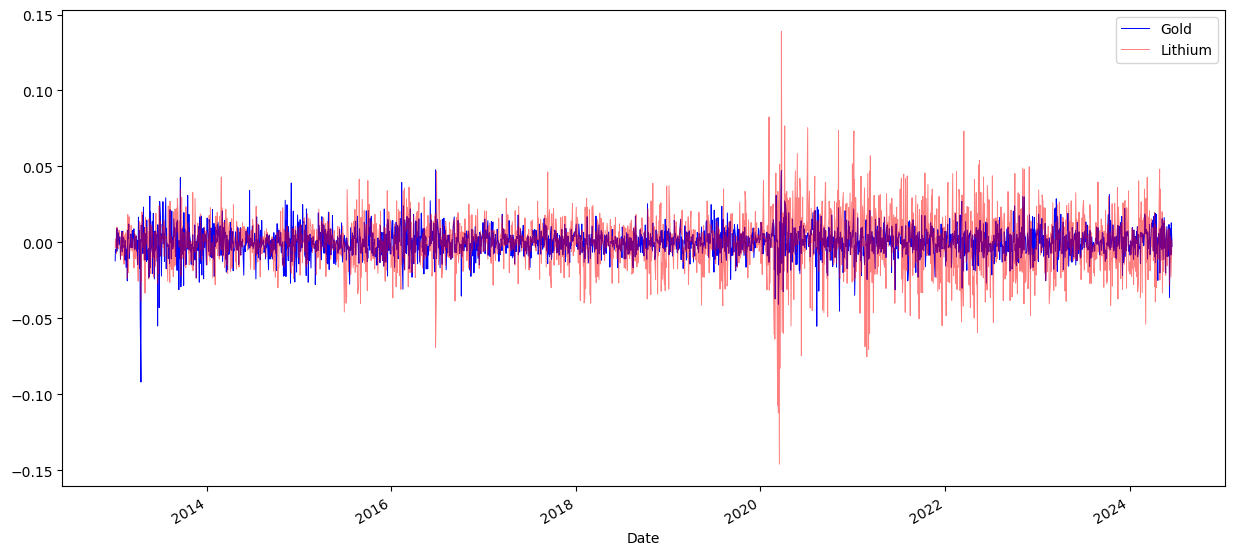

In [9]:
import numpy as np


# 일간 수익률
fig, ax = plt.subplots(figsize=(15, 7))
rate_c_df['Gold'].plot(ax=ax, lw=0.7, color='blue', label='Gold')
rate_c_df['Lithium'].plot(ax=ax, lw=0.7, color='red', alpha=0.5, label='Lithium')  # 투명도 조절
ax.legend()
plt.show()

## 금과 리튬 ETF간의 상관관계가 있는지 확인하기 위해 다중공산성 확인.

In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif["vif_score"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif["feature"] = features.columns    
    return vif

In [11]:
rate_c_df = rate_c_df.dropna()
get_vif(rate_c_df)

,vif_score,feature
0,1.011928,Gold
1,1.011928,Lithium


array([[<Axes: title={'center': 'Gold'}>,
        <Axes: title={'center': 'Lithium'}>]], dtype=object)

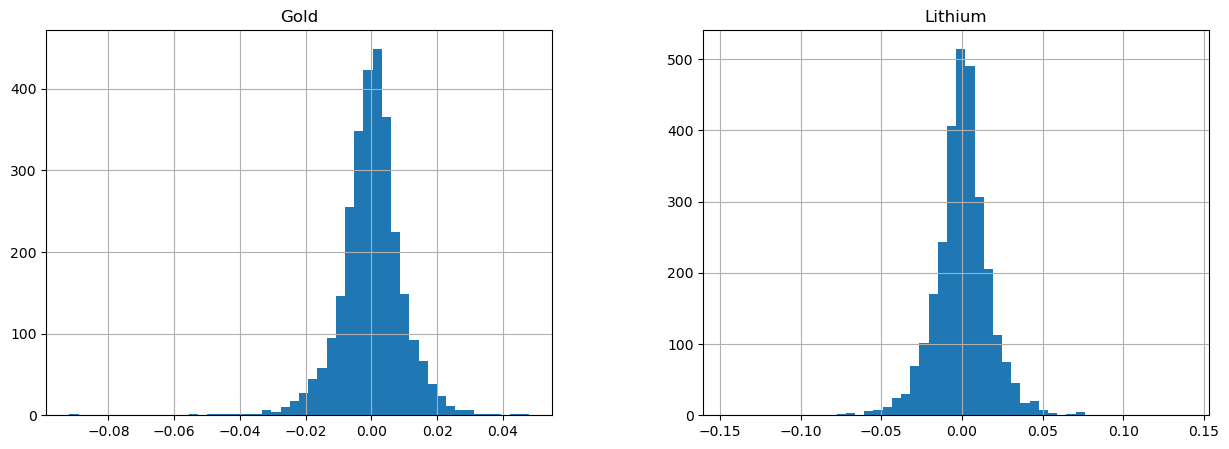

In [12]:
rate_c_df.hist(figsize = (15, 5), bins=50 )

## 금의 분포보다 리튬의 분포확인 시 첨도가 더 높은 부분을 확인할 수 있다.

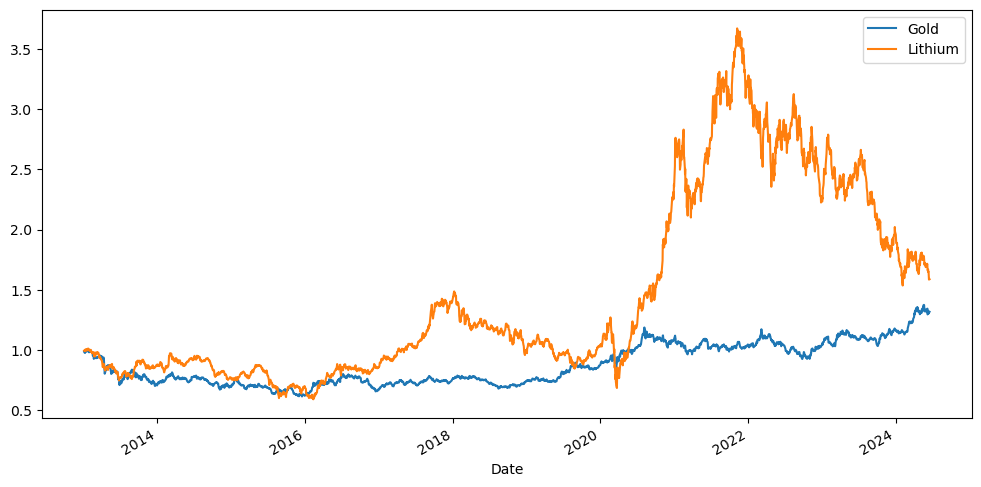

In [13]:
# 각 원소들의 누적합 : cumsum()
# 일간 수익률
rate_c_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

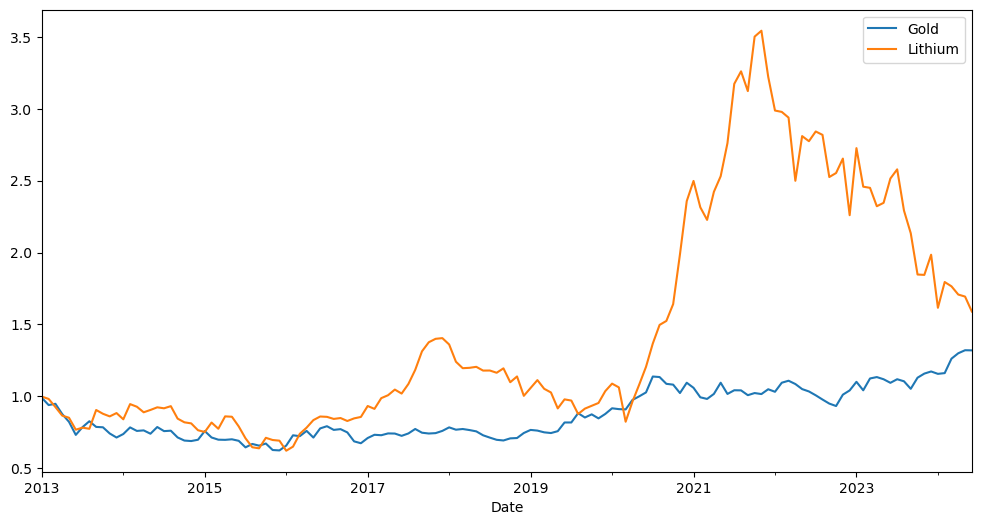

In [14]:
# 월간 수익률
# - 조금 더 스무스한 경향을 확인할 수 있다.
rate_c_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

# 리튬에 대하여 골든크로스와 데드크로스 부분을 확인한다.

In [15]:
window = 20

pre_l_df['min'] = pre_l_df['Lithium'].rolling(window=window).min()
pre_l_df['mean'] = pre_l_df['Lithium'].rolling(window=window).mean()
pre_l_df['std'] = pre_l_df['Lithium'].rolling(window=window).std()
pre_l_df['median'] = pre_l_df['Lithium'].rolling(window=window).median()
pre_l_df['max'] = pre_l_df['Lithium'].rolling(window=window).max()

pre_l_df = pre_l_df.dropna()
pre_l_df

,Lithium,min,mean,std,median,max
Date,,,,,,
2013-01-30,25.5802,25.4935,25.716350,0.140031,25.6843,26.0138
2013-01-31,25.5802,25.4935,25.712015,0.142954,25.6843,26.0138
2013-02-01,25.7363,25.4935,25.719820,0.139600,25.7016,26.0138
2013-02-04,25.5455,25.4935,25.716350,0.143163,25.7016,26.0138
2013-02-05,25.7363,25.4935,25.718950,0.143022,25.7276,26.0138
...,...,...,...,...,...,...
2024-06-11,42.3000,42.3000,44.152500,1.022447,43.9700,45.8000
2024-06-12,42.3500,42.3000,43.980500,1.021827,43.8800,45.8000
2024-06-13,41.4000,41.4000,43.804500,1.146971,43.7800,45.8000


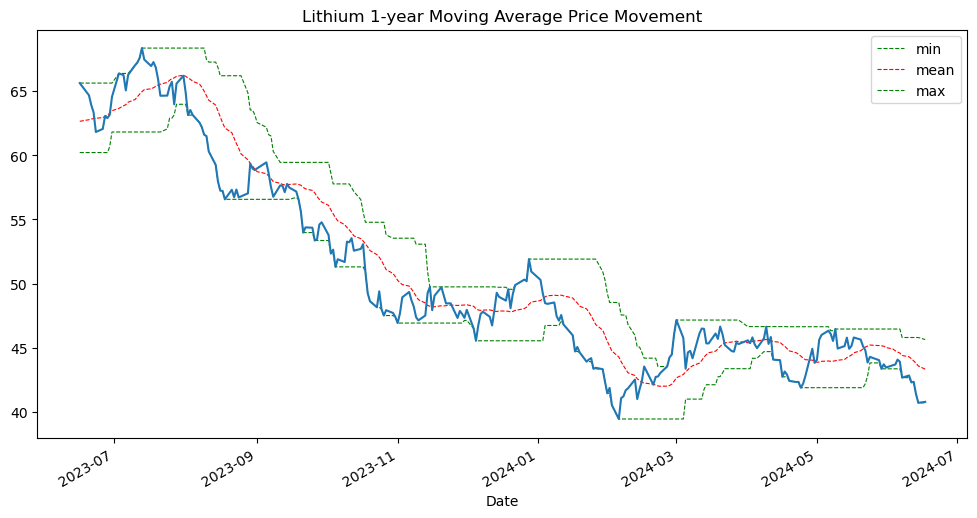

In [16]:
import matplotlib.pyplot as plt

ax = pre_l_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize= (12, 6), style=['g--','r--','g--'], lw=0.8)
pre_l_df['Lithium'].iloc[-252:].plot(ax=ax)
plt.title("Lithium 1-year Moving Average Price Movement")
plt.show()

In [17]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

# 단기
pre_l_df['SMA1'] = pre_l_df['Lithium'].rolling(window=21).mean() #short-term
# 장기
pre_l_df['SMA2'] = pre_l_df['Lithium'].rolling(window=252).mean() #long-term

pre_l_df[['Lithium', 'SMA1', 'SMA2']].tail()

,Lithium,SMA1,SMA2
Date,,,
2024-06-11,42.300,44.199048,50.785267
2024-06-12,42.350,44.066667,50.701743
2024-06-13,41.400,43.857619,50.609697
2024-06-14,40.710,43.657143,50.516131
2024-06-17,40.785,43.449762,50.417717


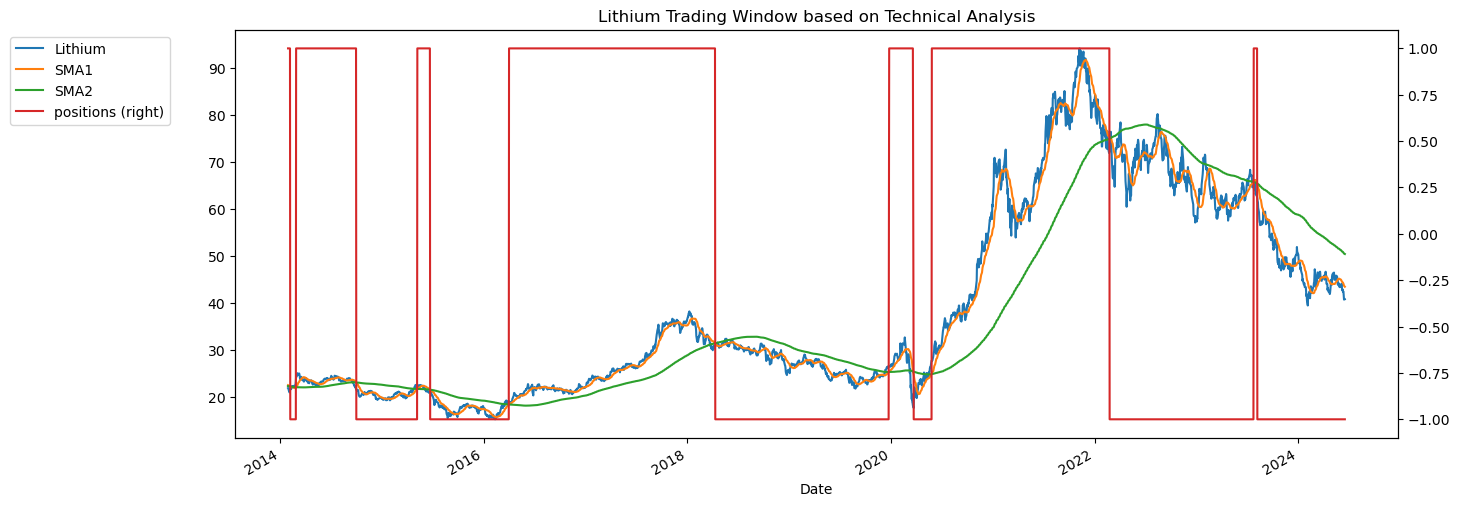

In [18]:
# 골든 크로스, 데드 크로스 확인

pre_l_df.dropna(inplace=True)

pre_l_df['positions'] = np.where(pre_l_df['SMA1'] > pre_l_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = pre_l_df[['Lithium', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("Lithium Trading Window based on Technical Analysis")
plt.show()

## 비정상 시계열 데이터이기 때문에 auto arima를 이용하여 정상 시계열 데이터 변경 후 모델 평가

In [19]:
pre_l_df = pd.DataFrame(l_df)
pre_l_df.columns = ['Lithium']

In [20]:
y_train = pre_l_df['Lithium'][:int(0.8 * len(pre_l_df))]
y_test = pre_l_df['Lithium'][int(0.8 * len(pre_l_df)):]

<Axes: xlabel='Date'>

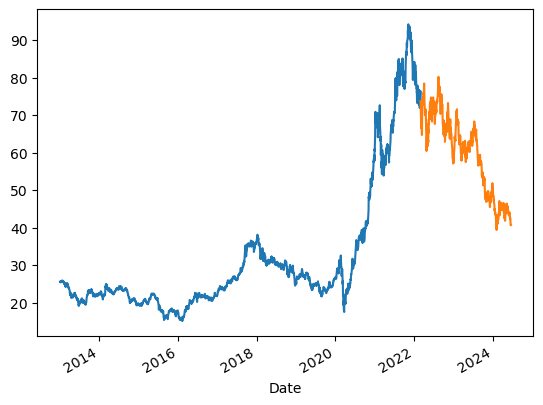

In [21]:
y_train.plot()
y_test.plot()

In [22]:
from pmdarima.arima import ndiffs

# KPSS(Kwiatkowski-Phillips-Schmidt-Shin) 테스트를 통해 차분이 필요한 횟수 계산
# alpha=0.05: 유의수준 5%, max_d=6: 최대 차분 횟수는 6
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)

# ADF(Augmented Dickey-Fuller) 테스트를 통해 차분이 필요한 횟수 계산
# alpha=0.05: 유의수준 5%, max_d=6: 최대 차분 횟수는 6
adf_diff = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)

# PP(Phillips-Perron) 테스트를 통해 차분이 필요한 횟수 계산
# alpha=0.05: 유의수준 5%, max_d=6: 최대 차분 횟수는 6
pp_diff = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

# 위의 세 테스트에서 나온 차분 횟수 중 최대값을 선택
n_diffs = max(kpss_diffs, adf_diff, pp_diff)

# 최종 차분 횟수를 출력
print(f"d = {n_diffs}")


d = 2


In [23]:
import pmdarima as pm
model = pm.auto_arima(y = y_train,
                      d = 2,
                      start_p =0,
                      max_p = 4,
                      start_q = 0,
                      max_q = 21,
                      m=1,
                      seasonal = False, 
                      stepwise = True,
                      trace = True
                      )


# y: 학습에 사용할 시계열 데이터입니다. 이 데이터는 종속변수로 사용됩니다.
# d: 차분 횟수입니다. 차분은 시계열 데이터를 안정화하는 데 사용됩니다. 여기서는 2번 차분을 수행합니다.
# start_p와 max_p: AR(자기회귀) 모델의 차수 범위를 설정합니다. start_p는 최소 차수를, max_p는 최대 차수를 나타냅니다. 이 범위 내에서 최적의 차수를 찾습니다.
# start_q와 max_q: MA(이동평균) 모델의 차수 범위를 설정합니다. start_q는 최소 차수를, max_q는 최대 차수를 나타냅니다. 이 범위 내에서 최적의 차수를 찾습니다.
# m: 계절성을 나타내는 주기입니다. 계절성이 없는 경우 m=1로 설정합니다. 예를 들어, 월간 데이터의 경우 m=12로 설정할 수 있습니다.
# seasonal: 계절성 ARIMA 모형을 사용할지 여부를 나타냅니다. 계절성을 사용하려면 True로 설정하고, 계절성을 사용하지 않으려면 False로 설정합니다.
# stepwise: 단계별로 최적의 모형을 찾을지 여부를 나타냅니다. True로 설정하면 단계별로 최적의 모형을 찾습니다. 이 방법은 계산 속도를 높일 수 있습니다.
# trace: 모델 학습 과정을 출력할지 여부를 나타냅니다. True로 설정하면 학습 과정을 출력하여 모델 선택 과정을 확인할 수 있습니다.

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6605.709, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5926.408, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6603.712, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5669.006, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=5544.491, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=5416.276, Time=0.22 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=5414.276, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=5542.491, Time=0.04 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0]          
Total fit time: 4.615 seconds


In [24]:
model.fit(y_train)

ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
# Prob(Q), 융-박스 검정 통계량 (0.05)
# 현재 서로 독립적이고 동일한 분포를 따른다.

# Prob(H), 이분산성 검정 통계량
# 현재 분산을 따르지 않는다.

# Prob(JB), 자크-베라 검정 통계량 (8174.96)
# 현재 일정한 평균과 분산을 따르지 않는다

# 이 3가지 검증을 가지고 금융 데이터에서 어떤 상품을 추천할 지 예측할 수 있음 (장기적 투가는 고위험, 단기 투자 권장) 이런식으로 작성

# Skew(쏠린 정도, 왜도)
# 음수쪽 방향이 꼬리가 길게 나타날 수 있음

# Kurtosis(뾰족한 정도, 첨도)
# 뾰족함

print(model.summary())

# N(0, 1) 정규분포

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2307
Model:               SARIMAX(4, 2, 0)   Log Likelihood               -2702.138
Date:                Mon, 17 Jun 2024   AIC                           5414.276
Time:                        23:34:12   BIC                           5442.990
Sample:                             0   HQIC                          5424.744
                               - 2307                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8038      0.010    -82.671      0.000      -0.823      -0.785
ar.L2         -0.5971      0.012    -51.655      0.000      -0.620      -0.574
ar.L3         -0.4088      0.011    -36.111      0.0

### 추가 통계량 해석
1. Ljung-Box (L1) (Q)
- Ljung-Box (L1) (Q): 3.74, Prob(Q): 0.05: Ljung-Box 검정은 잔차가 백색잡음인지 확인하는 테스트입니다.  
p-값이 0.05로, 잔차가 독립적이고 동일한 분포를 따르고 있음을 나타냅니다.  

2. Jarque-Bera (JB)
- Jarque-Bera (JB): 8174.96, Prob(JB): 0.00: Jarque-Bera 검정은 잔차의 정규성을 확인하는 테스트입니다.  
p-값이 0.00으로 매우 낮아, 잔차가 정규분포를 따르지 않음을 나타냅니다.  

3. Heteroskedasticity (H)
Heteroskedasticity (H): 21.64, Prob(H): 0.00: 이분산성을 확인하는 테스트입니다.  
p-값이 0.00으로 매우 낮아, 잔차의 분산이 일정하지 않음을 나타냅니다.

4. Skew: 0.14: 왜도를 나타냅니다. 값이 0에 가까울수록 대칭 분포를 나타내며, 현재 양수 값으로 꼬리가 긴 분포를 의미합니다.

5. Kurtosis: 12.22: 첨도를 나타냅니다. 값이 3에 가까울수록 정규분포에 가깝습니다. 높은 값은 분포가 뾰족함을 의미합니다.

#### 요약
- Ljung-Box 검정 (Prob(Q)): 잔차가 독립적이고 동일한 분포를 따릅니다.
- Jarque-Bera 검정 (Prob(JB)): 잔차가 정규성을 따르지 않습니다.
- Heteroskedasticity 검정 (Prob(H)): 잔차의 분산이 일정하지 않습니다.
- Skewness and Kurtosis: 왜도는 거의 대칭적이지만, 첨도는 매우 높아 분포가 뾰족합니다.

##### 결과
- 장기 투자: 높은 Kurtosis와 낮은 Skewness는 데이터가 일정하지 않고 변동성이 클 수 있음을 시사합니다. 장기 투자는 고위험일 수 있습니다.
- 단기 투자: 잔차가 백색잡음 분포를 따르므로, 단기적으로는 예측 가능성이 높아 단기 투자가 더 적합할 수 있습니다.  
이러한 해석을 바탕으로 모델의 적합성과 예측의 신뢰성을 평가할 수 있습니다.


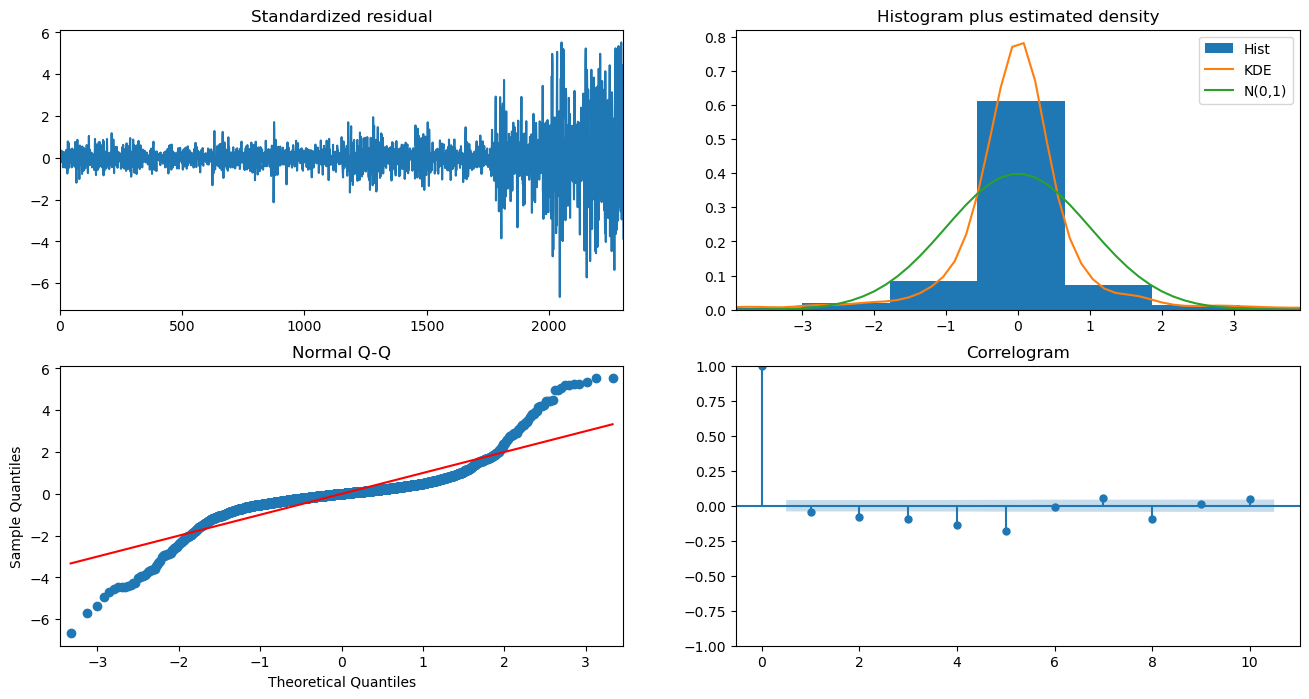

In [26]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

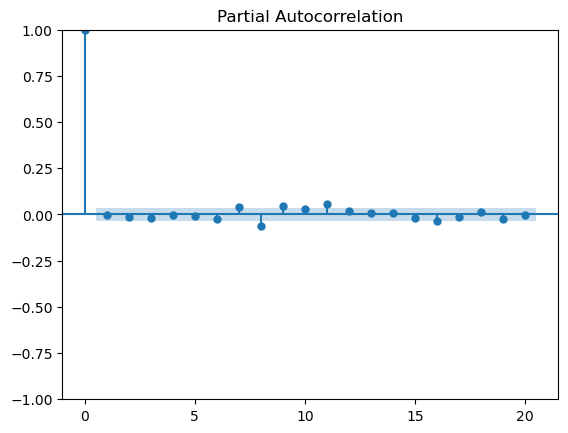

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 주식 데이터 프레임을 정상성있는 데이터 프레임으로 변경했기 때문에
# 부분자기상관함수를 사용하여 사분을 확인 (주식에 대한 데이터를 활용하기 때문에 서로 독립적인 데이터를 확인하는 \
# pacf를 사용)
plot_pacf(pre_l_df.diff().dropna(), lags=20)
plt.show()

In [28]:
# y_test를 아는 것 만큼 비교가 가능하기 때문에 predict 진행 시 주기를 적어준다.
# 이건 잘못된 경우 : 다음 차수 1개에 대한 패턴으로 계속 신뢰구간이 증가되며
# 정상적으로 할때는 다음 차수의 값을 결정한 후 추가 update를 해줘야 함

prediction = model.predict(len(y_test))
prediction

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2307     74.500780
2308     74.858228
2309     75.451157
2310     75.688491
2311     75.435461
           ...    
2879    176.029499
2880    176.206316
2881    176.383133
2882    176.559950
2883    176.736767
Length: 577, dtype: float64

In [29]:
# 신뢰구간의 평균값이 예측값이다.
prediction, conf_int = model.predict(n_periods =1, return_conf_int=True)
print(conf_int)
print(prediction)


[[72.9695422  76.03201863]]
2307    74.50078
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [30]:
# 지속적으로 업데이트를 하기 위한 방법 (예측은 한발자국씩 진행되어야 함)
prediction.tolist()[0]

74.50078041492839

In [31]:
# 지속적으로 업데이트를 하기 위한 방법 (예측은 한발자국씩 진행되어야 함)
def predict_one_step():
    prediction = model.predict(n_periods =1)
    return (prediction.tolist()[0])

In [32]:
preds = []
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [33]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2022-03-02,73.7506,74.500780
2022-03-03,72.1923,73.960369
2022-03-04,70.3497,72.253221
2022-03-07,66.7626,69.564480
2022-03-08,66.5078,64.754051
...,...,...
2024-06-11,42.3000,42.691685
2024-06-12,42.3500,42.029517
2024-06-13,41.4000,41.998364


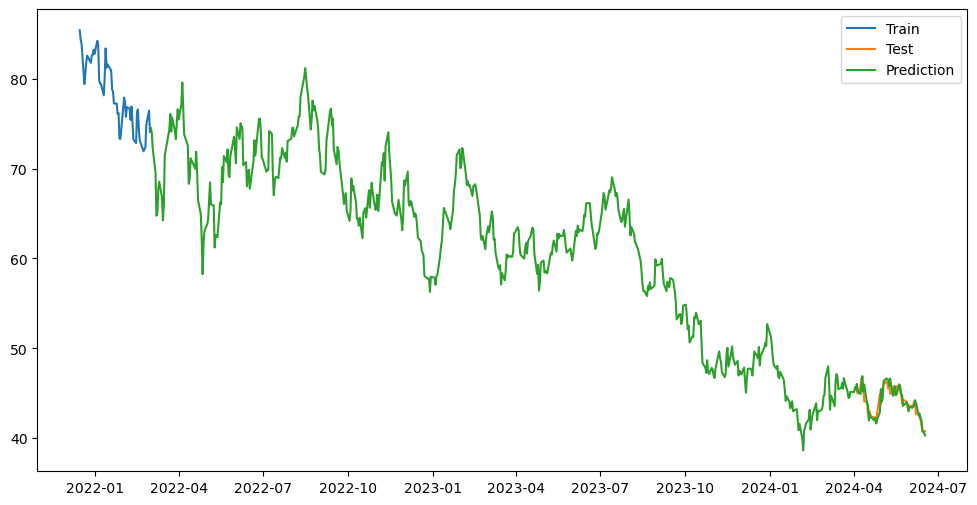

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(y_train.iloc[-52:], label='Train')
plt.plot(y_test.iloc[-52:], label='Test')
plt.plot(y_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [35]:
import numpy as np

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 1.6550


### 차분이 진행된 ARMA 모델을 사용하여 예측이 어느정도 되었는지 확인 

## ARIMA 모델을 사용하여 모델평가 진행.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


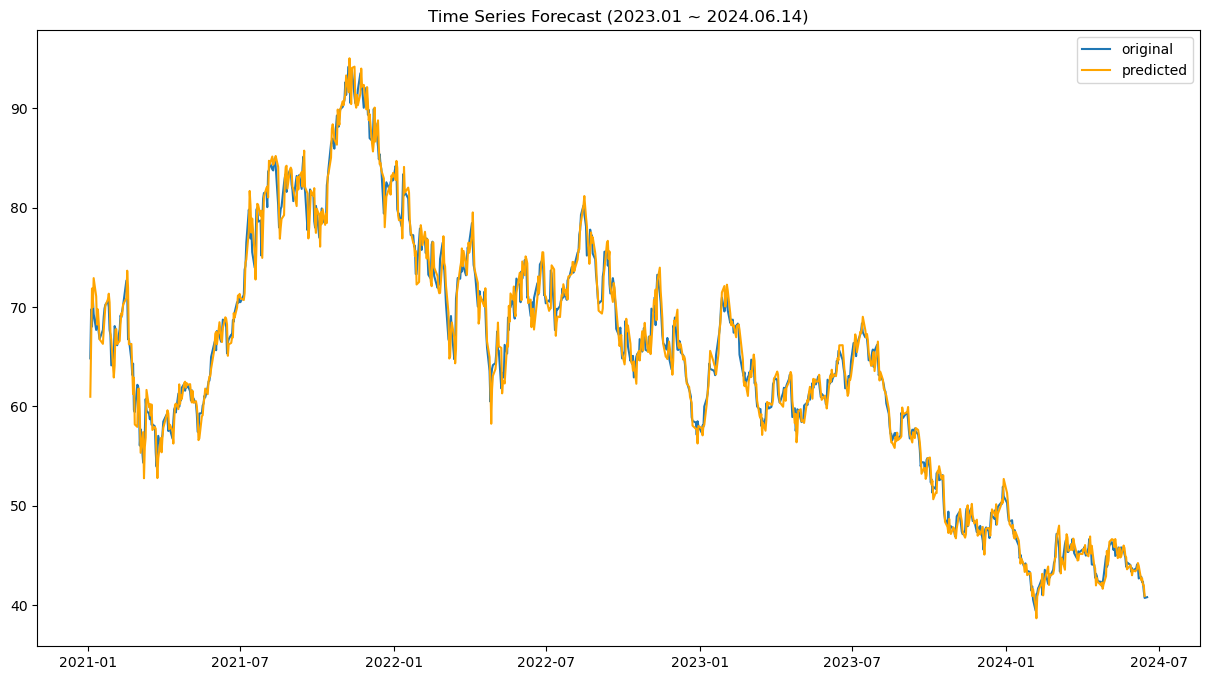

In [36]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(pre_l_df, order=(4, 2, 0))
model_fit = model.fit()

start_index = pd.to_datetime('2013-01-02')
end_index = pd.to_datetime('2024-06-14')

# 이 부분은 추가적인 예측이 아니라 기존 실제 데이터에서 모델 평가를 하는 부분
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))

# 실제 시계열 데이터
plt.plot(pre_l_df['2021':], label='original')
# model을 훈련시켜서 나온 결과에 대한 모델 검증
plt.plot(forecast['2021':], label='predicted', c='orange')
plt.title("Time Series Forecast (2023.01 ~ 2024.06.14)")
plt.legend()
plt.show()

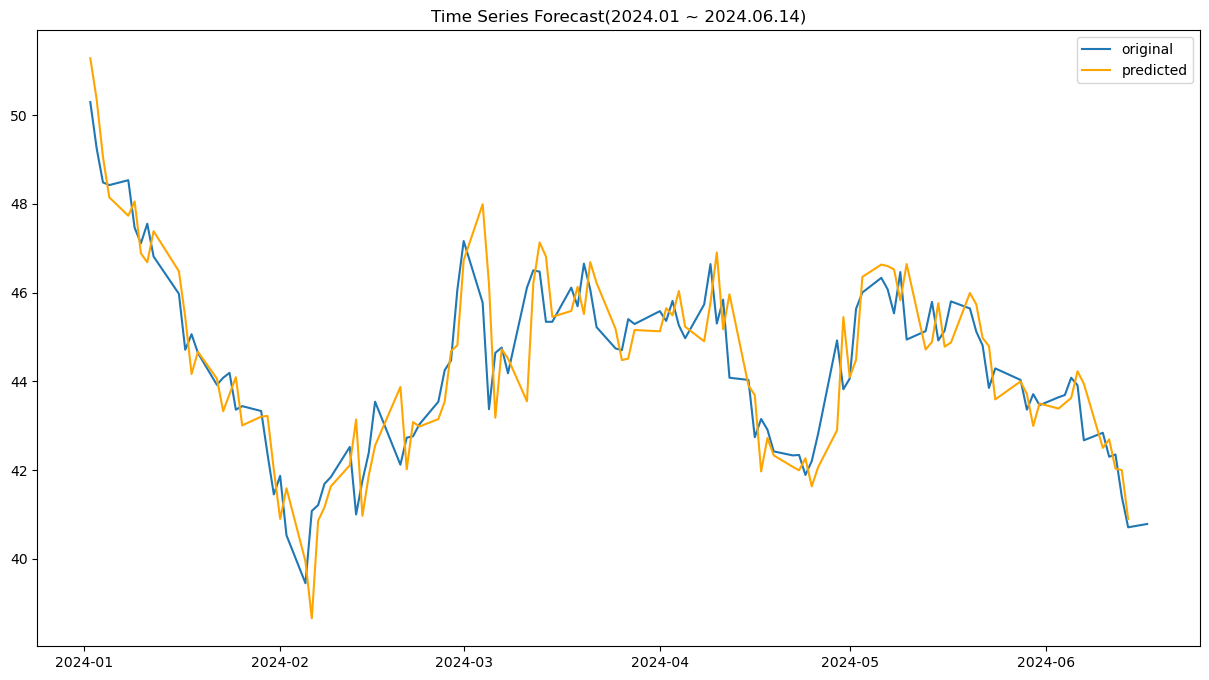

In [37]:
plt.figure(figsize=(15, 8))

# 실제 시계열 데이터
plt.plot(pre_l_df['2024':], label='original')
# model을 훈련시켜서 나온 결과에 대한 모델 검증
plt.plot(forecast['2024':], label='predicted', c='orange')
plt.title("Time Series Forecast(2024.01 ~ 2024.06.14)")
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 예측 결과와 실제 값 사이의 평균 제곱 오차(MSE)를 계산합니다.
# MSE는 오차의 제곱 평균으로, 오차가 클수록 값이 커집니다.
mse = mean_squared_error(pre_l_df['2013-01-02':'2024-06-14'], forecast)
print("Mean Squared Error", mse)

# 평균 제곱 오차(MSE)에서 제곱근을 취해 루트 평균 제곱 오차(RMSE)를 계산합니다.
# RMSE는 MSE보다 해석하기 쉬운 값으로, 오차의 단위와 동일한 값을 가집니다.
mse = mean_squared_error(pre_l_df['2013-01-02':'2024-06-14'], forecast)
print("Root Mean Squared Error", mse ** (1/2))

# 예측 결과와 실제 값 사이의 평균 제곱 로그 오차(MSLE)를 계산합니다.
# MSLE는 로그 변환 후의 제곱 평균 오차로, 상대적인 오차를 측정합니다.
msle = mean_squared_log_error(pre_l_df['2013-01-02':'2024-06-14'], forecast)
print("Mean Squared Log Error", msle)


Mean Squared Error 1.1107791254400166
Root Mean Squared Error 1.0539350669941752
Mean Squared Log Error 0.004130092181839133


## prophet 모델을 사용하여 데이터 예측

In [39]:
pre_l_df = pd.DataFrame(l_df)
pre_l_df.columns = ['Lithium']
pre_l_df

,Lithium
Date,
2013-01-02,25.6669
2013-01-03,25.5802
2013-01-04,25.6149
2013-01-07,25.6843
2013-01-08,25.4935
...,...
2024-06-11,42.3000
2024-06-12,42.3500
2024-06-13,41.4000


In [40]:
pre_l_df = pre_l_df.reset_index()
pre_l_df

,Date,Lithium
0,2013-01-02,25.6669
1,2013-01-03,25.5802
2,2013-01-04,25.6149
3,2013-01-07,25.6843
4,2013-01-08,25.4935
...,...,...
2879,2024-06-11,42.3000
2880,2024-06-12,42.3500
2881,2024-06-13,41.4000
2882,2024-06-14,40.7100


In [41]:
# prophet 모델을 사용하기 위해 시계열 인덱스를 ds 라는 독립변수로 선언해줘야 한다.
pre_l_df = pre_l_df.rename(columns={'Date': 'ds'})
pre_l_df = pre_l_df.rename(columns={'Lithium': 'y'})
pre_l_df

,ds,y
0,2013-01-02,25.6669
1,2013-01-03,25.5802
2,2013-01-04,25.6149
3,2013-01-07,25.6843
4,2013-01-08,25.4935
...,...,...
2879,2024-06-11,42.3000
2880,2024-06-12,42.3500
2881,2024-06-13,41.4000
2882,2024-06-14,40.7100


Prophet default 파라미터
growth: 'linear'

성장 곡선의 형태를 지정합니다. 기본값은 선형 성장입니다.
changepoints: None

변곡점(트렌드 변화가 일어나는 시점)을 지정합니다. 기본값은 None으로, Prophet은 자동으로 변곡점을 찾아냅니다.
n_changepoints: 25

기본적으로 25개의 변곡점을 사용합니다.
changepoint_range: 0.8

데이터의 첫 번째 80% 내에서 변곡점을 찾습니다.
yearly_seasonality: 'auto'

연간 계절성을 자동으로 감지합니다.
weekly_seasonality: 'auto'

주간 계절성을 자동으로 감지합니다.
daily_seasonality: False

일간 계절성을 사용하지 않습니다.
seasonality_mode: 'additive'

계절성의 효과를 더해나갑니다.
seasonality_prior_scale: 10.0

계절성 모델의 복잡성을 제어하는 패널티의 크기입니다.
holidays_prior_scale: 10.0

휴일 모델의 복잡성을 제어하는 패널티의 크기입니다.
changepoint_prior_scale: 0.05

변곡점 모델의 복잡성을 제어하는 패널티의 크기입니다.
mcmc_samples: 0

MCMC 샘플 수, 기본값은 0으로, MAP 추정치를 사용합니다.
interval_width: 0.80

예측 구간의 폭입니다. 기본값은 80%입니다.
uncertainty_samples: 1000

불확실성 추정치를 계산하기 위해 샘플링하는 횟수입니다.

In [42]:
from prophet import Prophet

model = Prophet().fit(pre_l_df)

23:34:53 - cmdstanpy - INFO - Chain [1] start processing
23:34:54 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][680:]

# 실제로 예측한 값이 정확하지 않을 수 있으며 그렇기 때문에 신뢰구간을 주의 깊게 봐야한다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


# 파라미터 조정 전
# ds	         yhat       yhat_lower  yhat_upper
# 2025-06-10	28.306628	20.056892	36.985133
# 2025-06-11	28.263444	19.828812	37.007334
# 2025-06-12	28.191400	19.330896	37.143274
# 2025-06-13	28.091361	19.662022	36.799929
# 2025-06-14	28.932144	20.175410	37.620402


# 파라미터 조정 후 (changepoint_prior_scale=, seasonality_prior_scale = , seasonality_mode='additive')
# 2025-06-11	30.767536	-5.611597	63.980409
# 2025-06-12	30.714167	-6.681540	63.115304
# 2025-06-13	30.657141	-6.542948	64.023022
# 2025-06-14	-31.532785	-66.083399	6.863647



,ds,yhat,yhat_lower,yhat_upper
3244,2025-06-13,27.968291,17.874586,36.555167
3245,2025-06-14,28.809751,18.797429,37.432938
3246,2025-06-15,28.753145,18.789621,38.179245
3247,2025-06-16,27.833667,17.779419,36.999421
3248,2025-06-17,27.797148,17.800406,37.217318


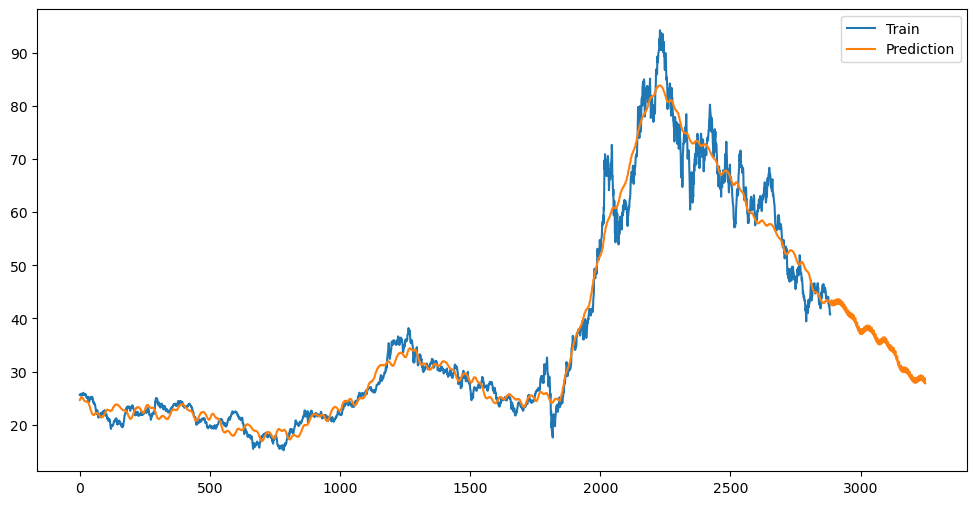

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(pre_l_df[['y']], label='Train')
plt.plot(forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


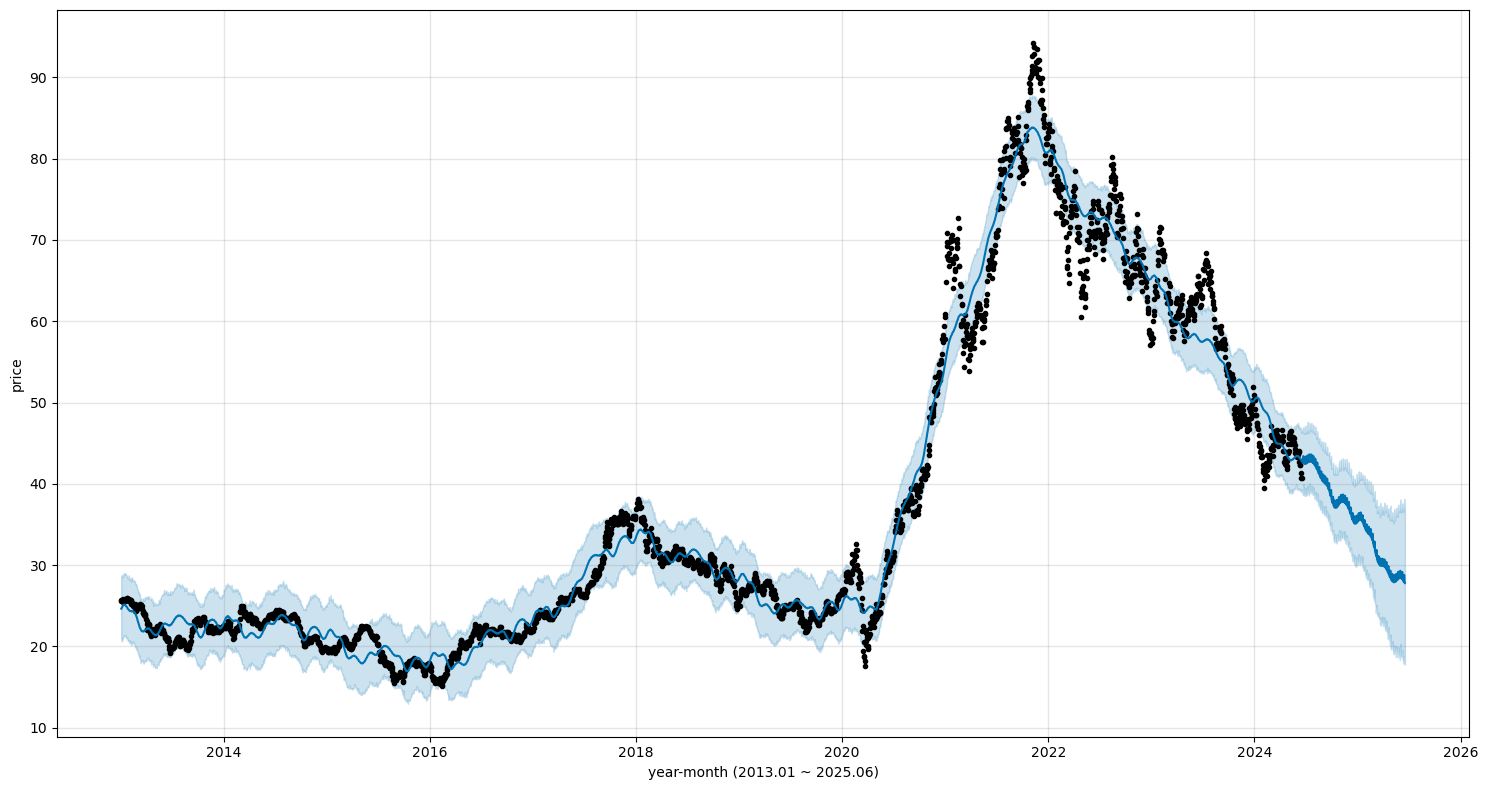

In [45]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month (2013.01 ~ 2025.06)', ylabel='price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

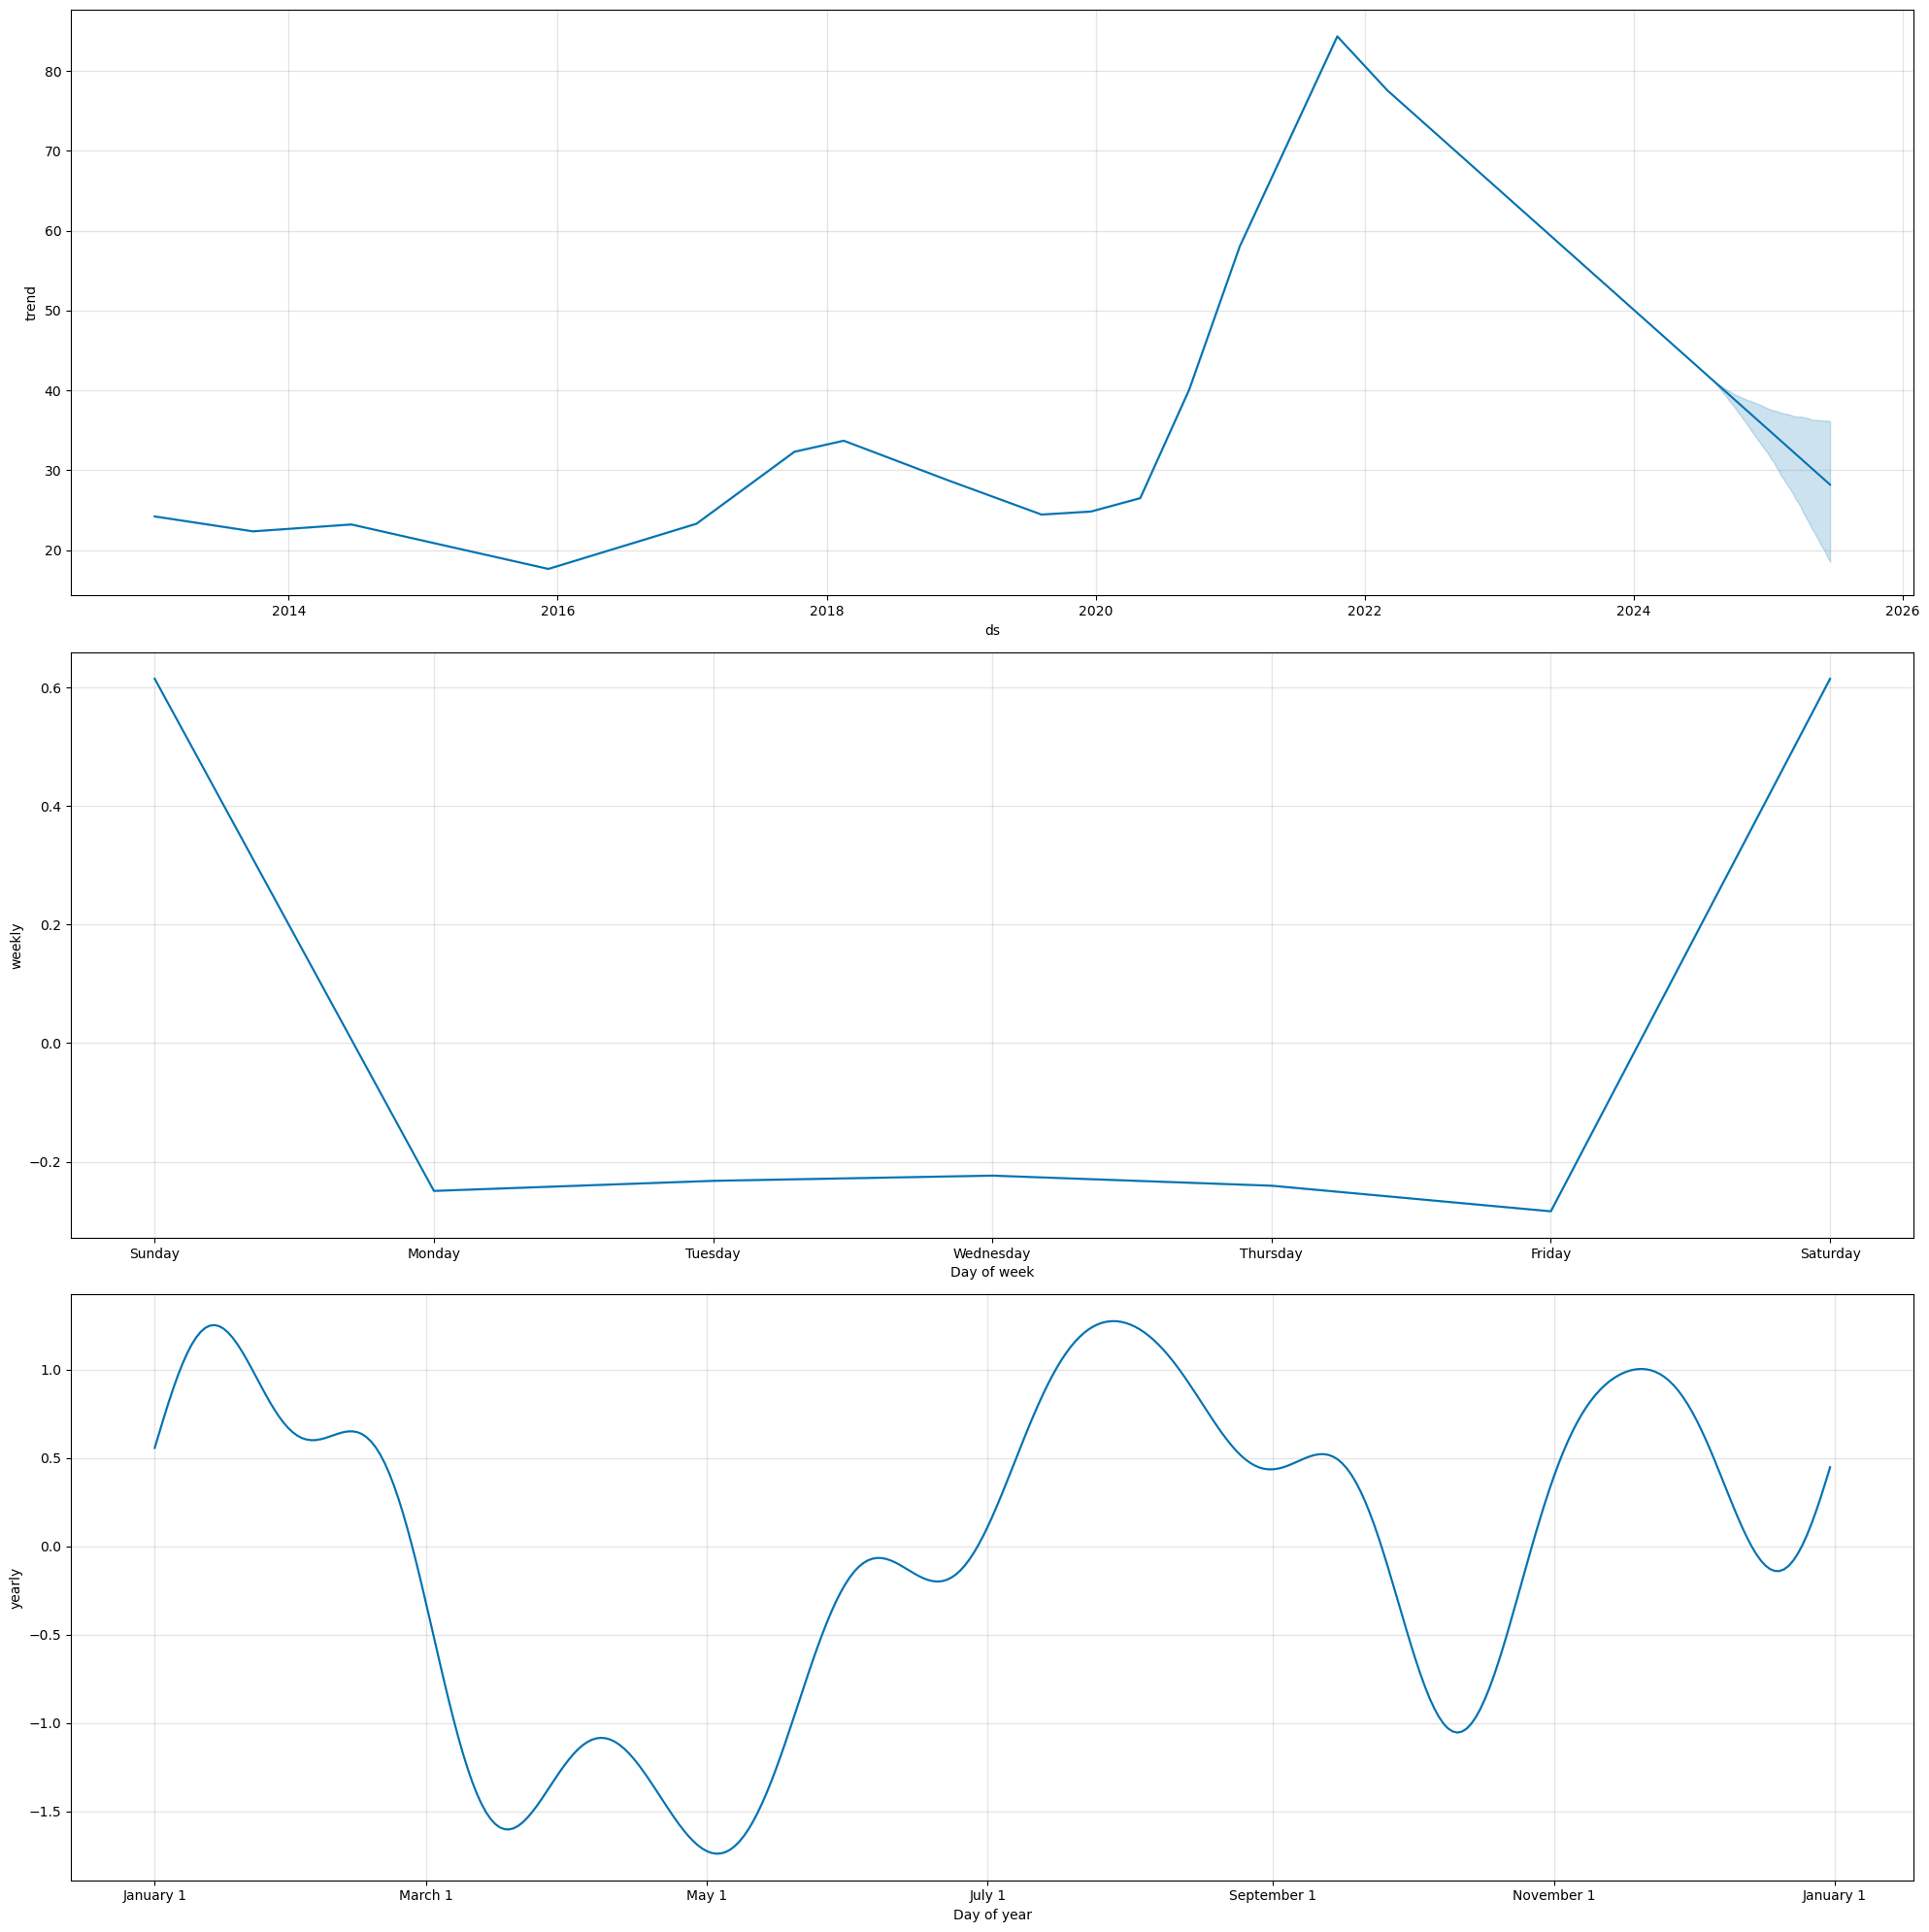

In [46]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

### Prophet 기본 모델에서 오차가 신뢰구간을 벗어나는 부분이 확인되어 파라미터를 조정하여 세부 조정을 진행해보려고 한다.

In [47]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_l_df) * 0.8)
test_len = int(len(pre_l_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_l_df.iloc[: train_len]
test_df = pre_l_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

23:34:55 - cmdstanpy - INFO - Chain [1] start processing
23:34:55 - cmdstanpy - INFO - Chain [1] done processing
23:34:57 - cmdstanpy - INFO - Chain [1] start processing
23:34:57 - cmdstanpy - INFO - Chain [1] start processing
23:34:57 - cmdstanpy - INFO - Chain [1] start processing
23:34:57 - cmdstanpy - INFO - Chain [1] start processing
23:34:57 - cmdstanpy - INFO - Chain [1] start processing
23:34:57 - cmdstanpy - INFO - Chain [1] start processing
23:34:57 - cmdstanpy - INFO - Chain [1] start processing
23:34:57 - cmdstanpy - INFO - Chain [1] start processing
23:34:58 - cmdstanpy - INFO - Chain [1] done processing
23:34:58 - cmdstanpy - INFO - Chain [1] done processing
23:34:58 - cmdstanpy - INFO - Chain [1] done processing
23:34:58 - cmdstanpy - INFO - Chain [1] start processing
23:34:58 - cmdstanpy - INFO - Chain [1] start processing
23:34:58 - cmdstanpy - INFO - Chain [1] done processing
23:34:58 - cmdstanpy - INFO - Chain [1] done processing
23:34:59 - cmdstanpy - INFO - Chain [

In [48]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
23,0.50,10.00,multiplicative,0.447383
37,5.00,1.00,multiplicative,0.447391
29,1.00,1.00,multiplicative,0.447402
47,10.00,10.00,multiplicative,0.447403
45,10.00,1.00,multiplicative,0.447405
39,5.00,10.00,multiplicative,0.447409
33,5.00,0.05,multiplicative,0.447410
21,0.50,1.00,multiplicative,0.447419
41,10.00,0.05,multiplicative,0.447440
35,5.00,0.10,multiplicative,0.447448


In [49]:
# 최적의 파라미터 값으로 model을 다시 훈련 시켜서 값을 확인 
model = Prophet(changepoint_prior_scale=10, 
                seasonality_prior_scale=10, 
                seasonality_mode='multiplicative')

model.fit(pre_l_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

23:44:03 - cmdstanpy - INFO - Chain [1] start processing
23:44:04 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2013-11-15,22.339234,19.489296,25.055985
222,2013-11-18,22.425265,19.487796,25.403107
223,2013-11-19,22.449392,19.406932,25.550481
224,2013-11-20,22.485147,19.595142,25.501733
225,2013-11-21,22.486746,19.345582,25.333616
...,...,...,...,...
3244,2025-06-13,30.698761,-11.781860,66.093263
3245,2025-06-14,-34.832967,-77.196327,13.637927
3246,2025-06-15,-34.780795,-76.415821,13.372191
3247,2025-06-16,30.613880,-12.251802,66.344308


In [50]:
# 시계열 데이터프레임으로 다시 만들어 시각화를 편하게 하기위하여 인덱스 재정의 후 데이터 프레임 재선언
reset_l_df = pre_l_df.copy()
reset_l_df.set_index('ds', inplace=True)

# 예측 결과 데이터 프레임 생성
forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

reset_l_df.index = pd.to_datetime(reset_l_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

In [51]:
# reset_l_df[['y']]
forecast_df
forecast_df[['yhat', 'yhat_lower', 'yhat_upper']].tail()

,yhat,yhat_lower,yhat_upper
ds,,,
2025-06-13,30.698761,-11.781860,66.093263
2025-06-14,-34.832967,-77.196327,13.637927
2025-06-15,-34.780795,-76.415821,13.372191
2025-06-16,30.613880,-12.251802,66.344308
2025-06-17,30.586612,-12.790554,67.595312


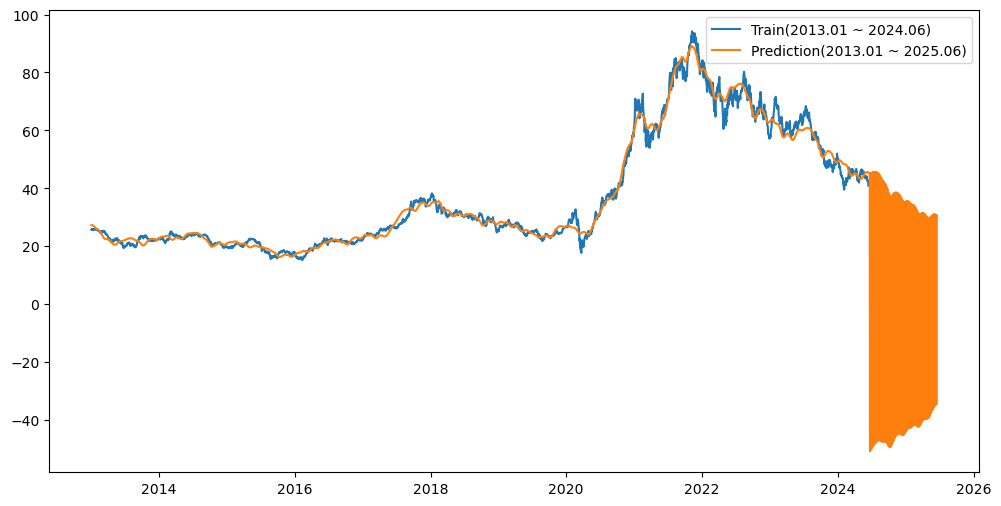

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(reset_l_df[['y']], label='Train(2013.01 ~ 2024.06)')
plt.plot(forecast_df[['yhat']], label='Prediction(2013.01 ~ 2025.06)')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


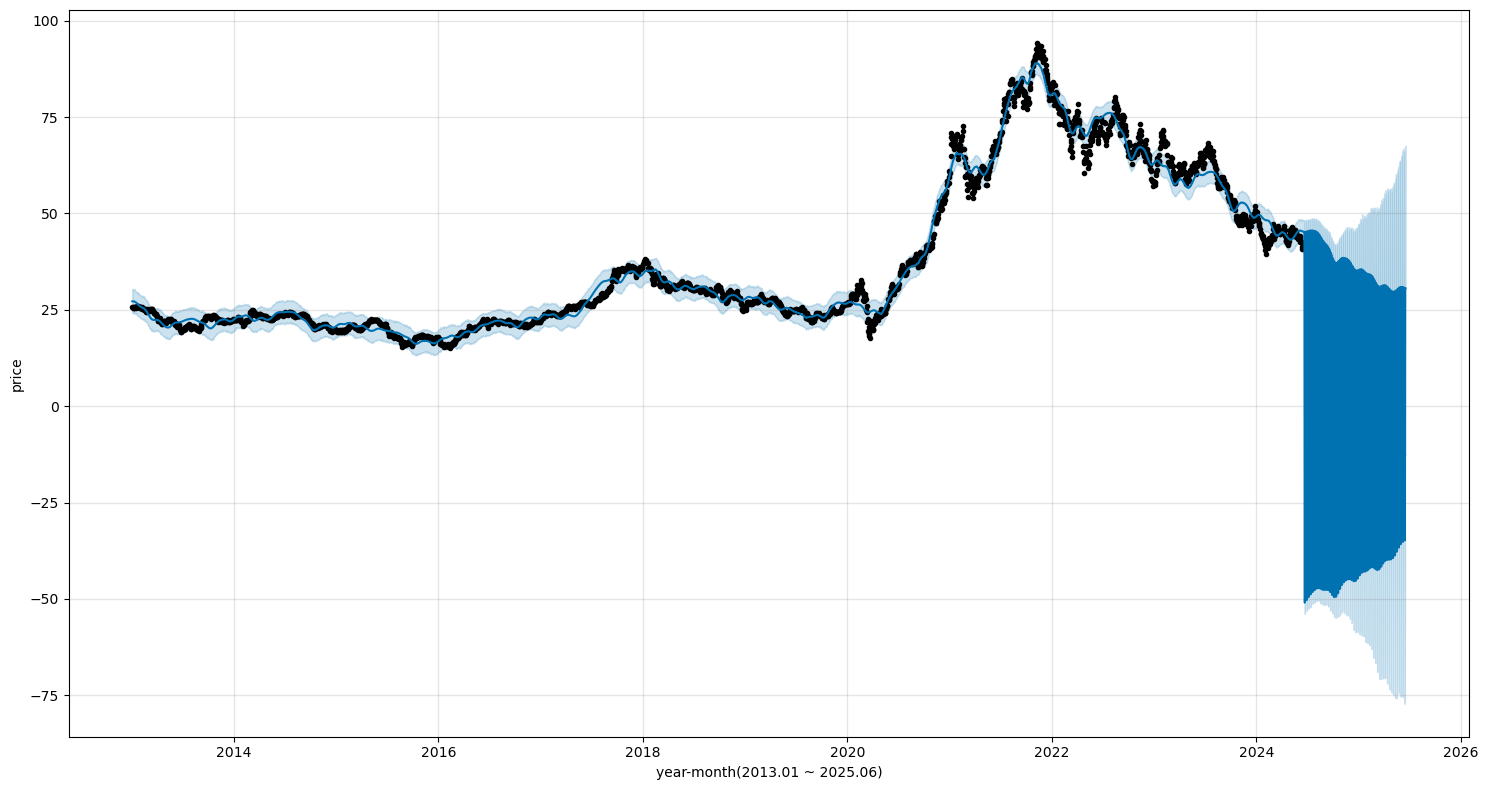

In [53]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month(2013.01 ~ 2025.06)', ylabel='price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

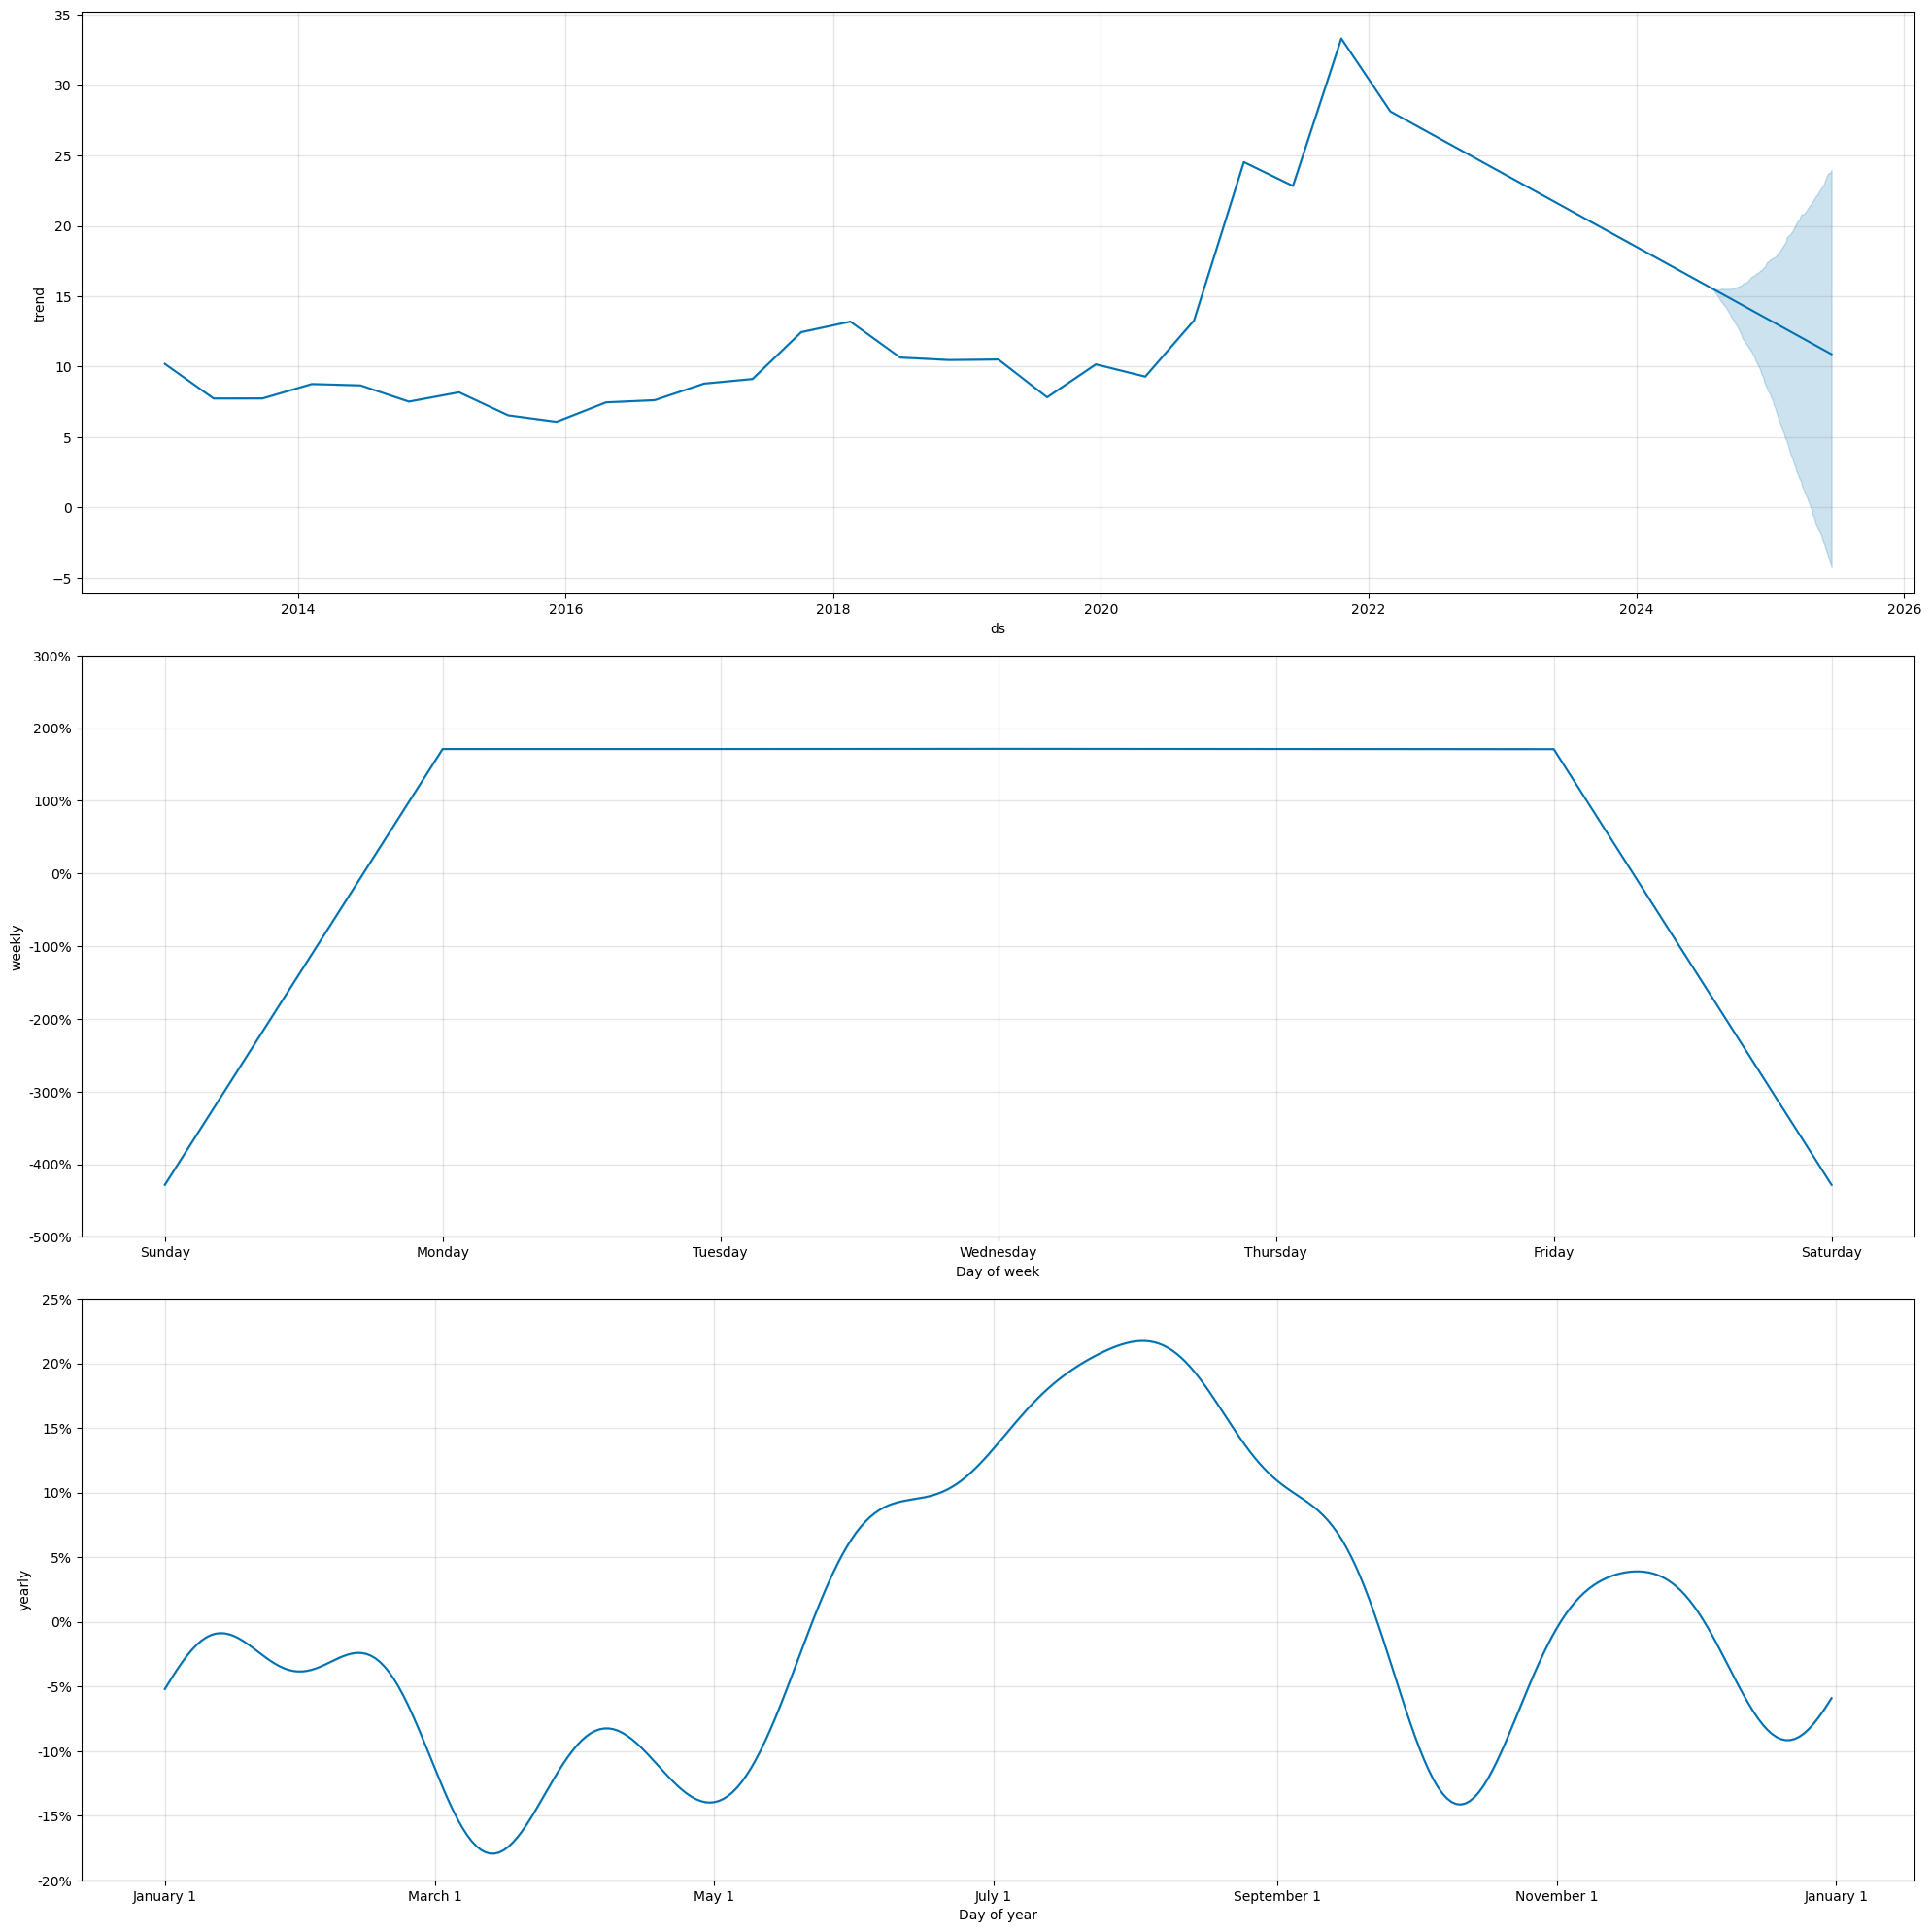

In [54]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

In [55]:
reset_l_df[['y']]['2024':]

,y
ds,
2024-01-02,50.290
2024-01-03,49.250
2024-01-04,48.480
2024-01-05,48.420
2024-01-08,48.530
...,...
2024-06-11,42.300
2024-06-12,42.350
2024-06-13,41.400


In [56]:
forecast_df[['yhat']]

,yhat
ds,
2013-01-02,27.209327
2013-01-03,27.198330
2013-01-04,27.183286
2013-01-07,27.190603
2013-01-08,27.181656
...,...
2025-06-13,30.698761
2025-06-14,-34.832967
2025-06-15,-34.780795


In [57]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# plt.plot(reset_l_df[['y']]['2024':], label='Train')
# plt.plot(forecast_df[['yhat']]['2024':], label='Prediction')
# plt.legend()
# plt.show()

<!-- ## 결과값에 로그를 취해 신뢰성을 높이고자 진행 -->

In [58]:
# from prophet import Prophet
# from prophet.diagnostics import cross_validation, performance_metrics
# import itertools

# # changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# # seasonality_prior_scale: 계절성을 반영하는 단위이다.
# # seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.

# pre_l_df['y'] = np.log(pre_l_df['y'])  # 로그 변환

# search_space = {
#     'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
#     'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
#     'seasonality_mode': ['additive', 'multiplicative']
# }

# # itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
# param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

# train_len = int(len(pre_l_df) * 0.8)
# test_len = int(len(pre_l_df) * 0.2)

# train_size = f'{train_len} days'
# test_size = f'{test_len} days'
# train_df = pre_l_df.iloc[: train_len]
# test_df = pre_l_df.iloc[train_len: ]

# mapes = []
# for param in param_combinded:
#     model = Prophet(**param)
#     model.fit(train_df)

#     # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
#     # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
#     # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
#     # 메모리 사용량이 높을 수 있다.
#     cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
#     df_p = performance_metrics(cv_df, rolling_window=1)
#     mapes.append(df_p['mape'].values[0])

# tuning_result = pd.DataFrame(param_combinded)
# tuning_result['mape'] = mapes       

# # 예측 결과 역변환
# forecast['yhat'] = np.exp(forecast['yhat'])
# forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
# forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

In [59]:
# tuning_result.sort_values(by='mape')

In [60]:
# # 최적의 파라미터 값으로 model을 다시 훈련 시켜서 값을 확인 
# model = Prophet(changepoint_prior_scale=5.0, 
#                 seasonality_prior_scale=0.1, 
#                 seasonality_mode='multiplicative')

# model.fit(pre_l_df)
# future = model.make_future_dataframe(periods=365)
# forecast = model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

In [61]:
# # 시계열 데이터프레임으로 다시 만들어 시각화를 편하게 하기 위해 인덱스 재정의 후 데이터 프레임 재선언
# reset_l_df = pre_l_df.copy()
# reset_l_df.set_index('ds', inplace=True)

# # 예측 결과 데이터 프레임 생성
# forecast_df = forecast.copy()
# forecast_df = forecast_df.set_index('ds')

# reset_l_df.index = pd.to_datetime(reset_l_df.index)
# forecast_df.index = pd.to_datetime(forecast_df.index)


In [62]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# plt.plot(reset_l_df['y'], label='Train')
# plt.plot(forecast_df['yhat'], label='Prediction')
# plt.legend()
# plt.show()


<!-- ## 3년짜리 분석 -->

In [63]:
# # 최적의 파라미터 값으로 model을 다시 훈련 시켜서 값을 확인 
# model = Prophet(changepoint_prior_scale=0.05, 
#                 seasonality_prior_scale=1, 
#                 seasonality_mode='additive')

# model.fit(pre_l_df)
# future = model.make_future_dataframe(periods=1095)
# forecast = model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

In [64]:
# # 시계열 데이터프레임으로 다시 만들어 시각화를 편하게 하기 위해 인덱스 재정의 후 데이터 프레임 재선언
# reset_l_df = pre_l_df.copy()
# reset_l_df.set_index('ds', inplace=True)

# # 예측 결과 데이터 프레임 생성
# forecast_df = forecast.copy()
# forecast_df = forecast_df.set_index('ds')

# reset_l_df.index = pd.to_datetime(reset_l_df.index)
# forecast_df.index = pd.to_datetime(forecast_df.index)


In [65]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# plt.plot(reset_l_df['y'], label='Train')
# plt.plot(forecast_df['yhat'], label='Prediction')
# plt.legend()
# plt.show()


## 예측 구간을 조절하여 신뢰성을 높이고자 진행

In [66]:
pre_l_df = pd.DataFrame(l_df)
pre_l_df.columns = ['Lithium']
pre_l_df

,Lithium
Date,
2013-01-02,25.6669
2013-01-03,25.5802
2013-01-04,25.6149
2013-01-07,25.6843
2013-01-08,25.4935
...,...
2024-06-11,42.3000
2024-06-12,42.3500
2024-06-13,41.4000


#### 2020 년 부터 훈련 진행.


In [67]:
pre_l_df = pre_l_df['2020':].reset_index()
pre_l_df


,Date,Lithium
0,2020-01-02,26.9073
1,2020-01-03,26.5382
2,2020-01-06,26.6548
3,2020-01-07,27.0142
4,2020-01-08,26.4508
...,...,...
1117,2024-06-11,42.3000
1118,2024-06-12,42.3500
1119,2024-06-13,41.4000
1120,2024-06-14,40.7100


In [68]:
# prophet 모델을 사용하기 위해 시계열 인덱스를 ds 라는 독립변수로 선언해줘야 한다.
pre_l_df = pre_l_df.rename(columns={'Date': 'ds'})
pre_l_df = pre_l_df.rename(columns={'Lithium': 'y'})
pre_l_df

,ds,y
0,2020-01-02,26.9073
1,2020-01-03,26.5382
2,2020-01-06,26.6548
3,2020-01-07,27.0142
4,2020-01-08,26.4508
...,...,...
1117,2024-06-11,42.3000
1118,2024-06-12,42.3500
1119,2024-06-13,41.4000
1120,2024-06-14,40.7100


In [69]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_l_df) * 0.8)
test_len = int(len(pre_l_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_l_df.iloc[: train_len]
test_df = pre_l_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

23:44:06 - cmdstanpy - INFO - Chain [1] start processing
23:44:06 - cmdstanpy - INFO - Chain [1] done processing
23:44:07 - cmdstanpy - INFO - Chain [1] start processing
23:44:07 - cmdstanpy - INFO - Chain [1] done processing
23:44:07 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] start processing
23:44:08 - cmdstanpy - INFO - Chain [1] done processing
23:44:08 - cmdstanpy - INFO - Chain [1] done processing
23:44:08 - cmdstanpy - INFO - Chain [1] done processing
23:44:08 - cmdstanpy - INFO - Chain [1] done processing
23:44:08 - cmdstanpy - INFO - Chain [1] done processing
23:44:08 - cmdstanpy - INFO - Chain [1

In [70]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
0,0.05,0.05,additive,0.118030
2,0.05,0.10,additive,0.122753
10,0.10,0.10,additive,0.123114
8,0.10,0.05,additive,0.123223
4,0.05,1.00,additive,0.123989
6,0.05,10.00,additive,0.124381
12,0.10,1.00,additive,0.125869
14,0.10,10.00,additive,0.125985
9,0.10,0.05,multiplicative,0.154272
16,0.50,0.05,additive,0.160142


In [71]:
# 최적의 파라미터 값으로 model을 다시 훈련 시켜서 값을 확인 
model = Prophet(changepoint_prior_scale=0.05, 
                seasonality_prior_scale=1, 
                seasonality_mode='additive')

model.fit(pre_l_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

23:47:02 - cmdstanpy - INFO - Chain [1] start processing
23:47:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2020-11-16,51.235830,47.311619,55.108721
222,2020-11-17,51.501240,47.806063,55.151789
223,2020-11-18,51.776046,47.802115,55.634527
224,2020-11-19,51.955235,48.152196,56.016805
225,2020-11-20,52.120332,48.307556,55.959875
...,...,...,...,...
1482,2025-06-13,24.607614,-5.495662,53.760972
1483,2025-06-14,23.967080,-5.499380,52.765779
1484,2025-06-15,23.934561,-6.367067,53.691110
1485,2025-06-16,24.591697,-4.984049,53.897001


In [72]:
# 시계열 데이터프레임으로 다시 만들어 시각화를 편하게 하기 위해 인덱스 재정의 후 데이터 프레임 재선언
reset_l_df = pre_l_df.copy()
reset_l_df.set_index('ds', inplace=True)

# 예측 결과 데이터 프레임 생성
forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

reset_l_df.index = pd.to_datetime(reset_l_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)


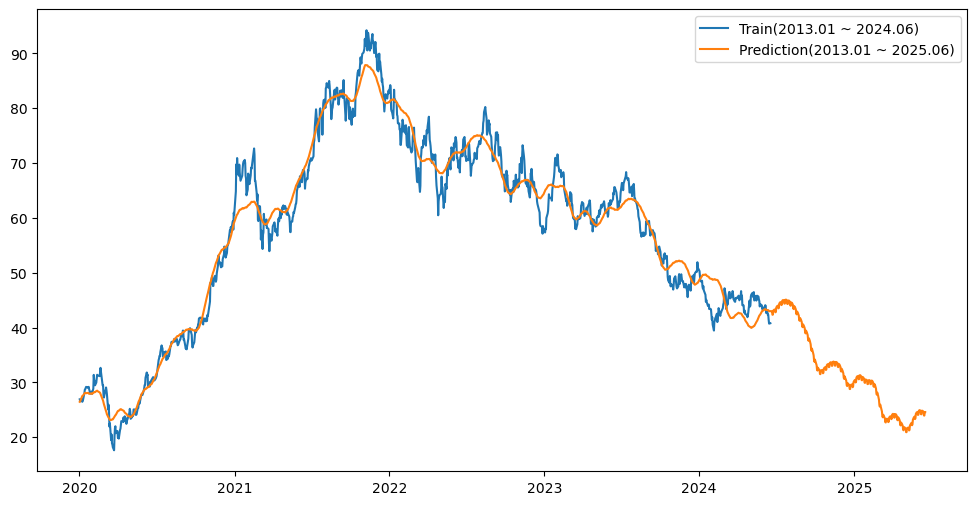

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(reset_l_df['y'], label='Train(2013.01 ~ 2024.06)')
plt.plot(forecast_df['yhat'], label='Prediction(2013.01 ~ 2025.06)')
plt.legend()
plt.show()


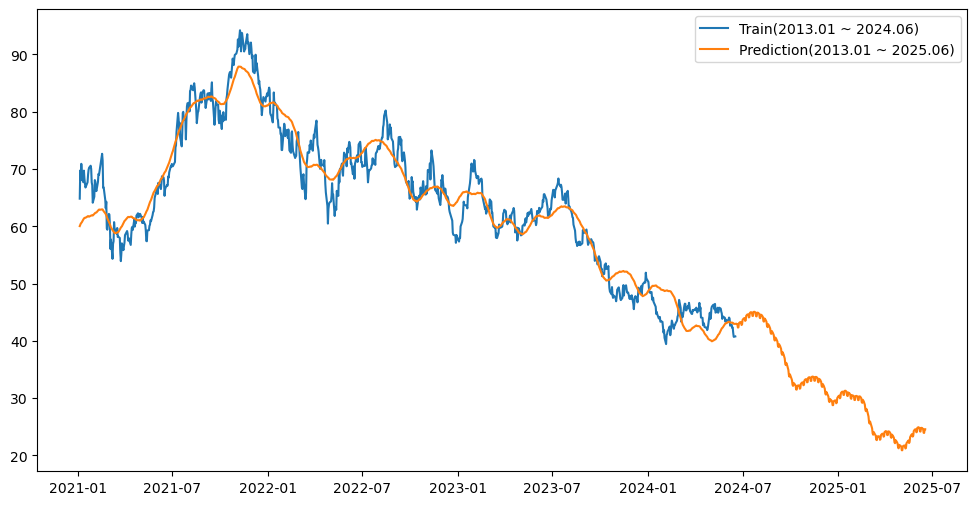

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(reset_l_df[['y']]['2021':], label='Train(2013.01 ~ 2024.06)')
plt.plot(forecast_df[['yhat']]['2021':], label='Prediction(2013.01 ~ 2025.06)')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


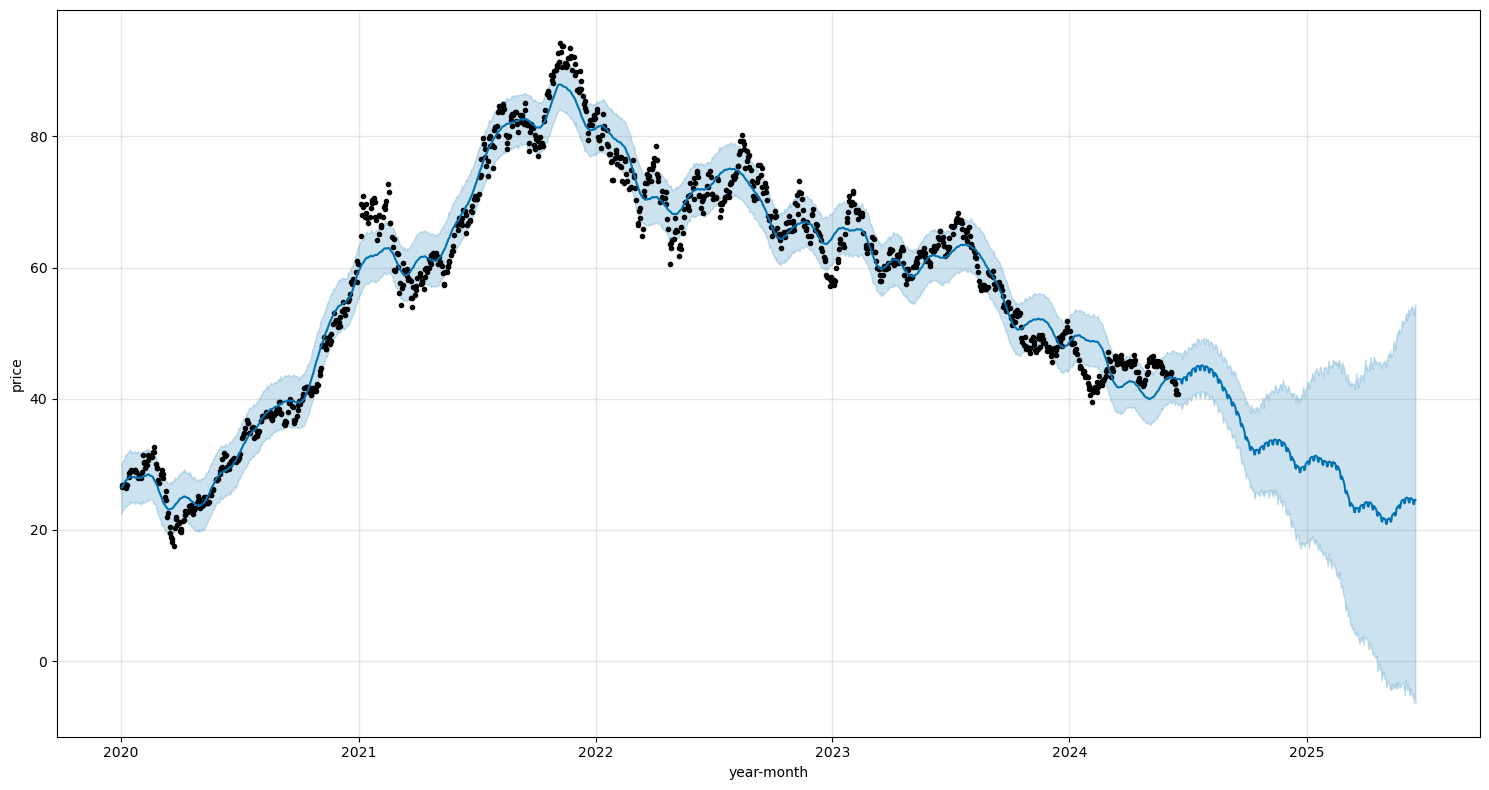

In [75]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

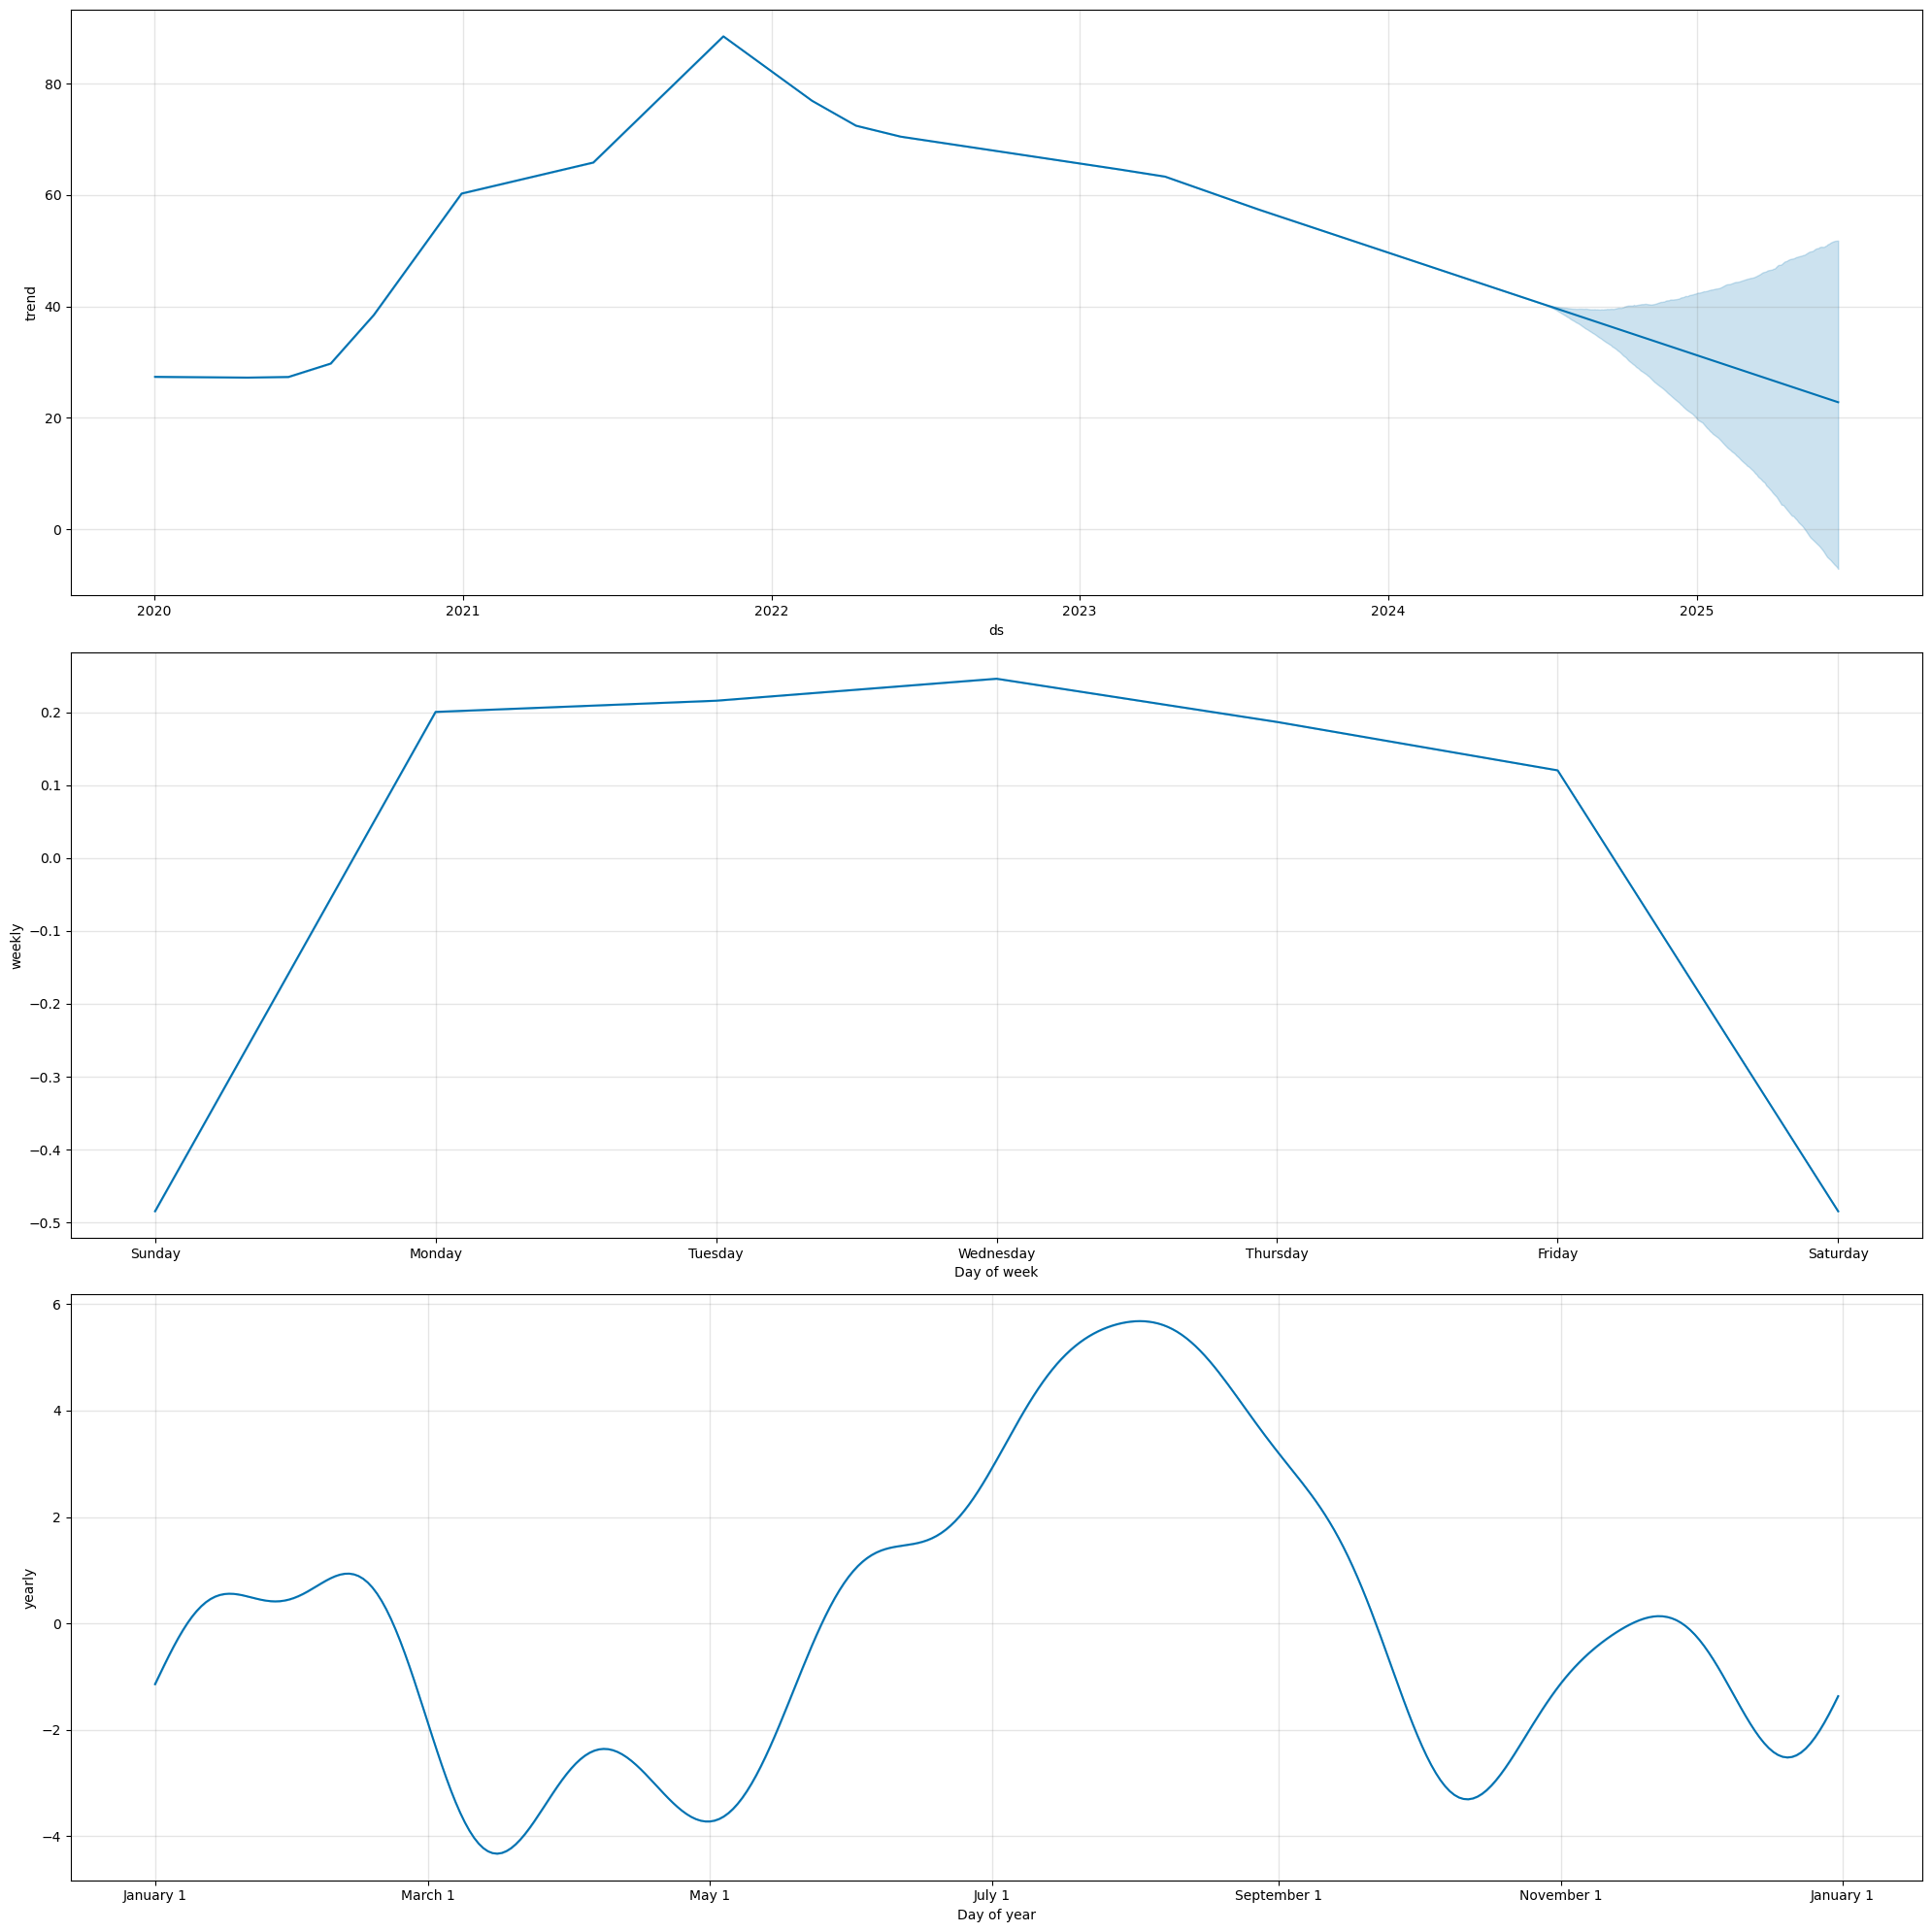

In [76]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

### 5. 예측 결과 분석 및 설명
금 가격과 리튬 ETF를 비교한 결과, 리튬 ETF에서 특정 시점을 기점으로 큰 변동(shock)이 발생한 것을 확인할 수 있었습니다  
2020년 이전에는 리튬 ETF가 안정적인 모습을 보였으나, 2020년 이후 전기차 생산량이 급증하면서 해당 ETF 종목의 가격이 크게 상승했습니다.  
이후 시간이 지남에 따라 다시 안정화되는 경향을 보이고 있습니다.  

ARIMA 모델을 사용하여 2013년부터 2024년까지의 데이터를 평가한 결과, 예측 오차가 x 정도로 나타났으며 모델 평가가 좋았다고 판단됩니다.  
Prophet 모델을 사용하여 2025년 리튬 ETF를 예측한 결과, 시간이 지날수록 ETF 가격이 하락하는 경향을 보였습니다.  
이는 2020년에서 2023년 사이에 발생한 변동이 shock라는 부분에 신뢰성을 높여주는 결과입니다.  
해당 ETF는 비정상 시계열 데이터로 예측이 어려운 추세를 보였으며, 금과 같은 다중 공선성이 없는 자산과는 연관성이 없었습니다. 그러나 대용량 배터리를 만드는 데 사용되는 전기차 생산량과는 연관성이 있을 것으로 판단되었습니다.  


### 6. 느낀점
시계열 데이터 분석에서 누적값을 사용하는지, 곱한 값을 사용하는지에 따라 시간이 지남에 따른 결과가 달라질 수 있다는 것을 확인했습니다.  
모델 훈련에 사용되는 데이터의 날짜에 따라 예측 결과가 달라질 수 있으며, 너무 연관성이 없는 과거 데이터를 사용하기보다는 연관성이 있는 데이터를 사용하는 것이 시계열 데이터 훈련에 더 효과적이라는 점을 깨달았습니다.  